In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('BRFSS_cleaned.csv', index_col = 0)

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckup,ExerciseLast30days,SleepTime,HadHeartAttack,HadAngina,...,HeartDisease,RaceEthnicityGroup,AgeGroup5yrs,Height,Weight,BMI,LevelOfSmoker,AlcoholLast30days,DrinkOccasionsPerDay,TestedForHIV
1,Alabama,Female,Excellent,0.0,0.0,Never,No,6.0,No,No,...,No,"White only, non-Hispanic",Age 80 or older,1.60,68.04,26.57,Never smoked,No,0,No
2,Alabama,Female,Very Good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,...,No,"White only, non-Hispanic",Age 55 to 59,1.57,63.50,25.61,Never smoked,No,0,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,No,"White only, non-Hispanic",NaN,1.65,63.50,23.30,Current smoker - now smokes some days,No,0,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,No,"White only, non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Never smoked,Yes,10,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,Yes,No,...,Yes,"White only, non-Hispanic",Age 80 or older,1.80,84.82,26.08,Never smoked,No,0,No


In [4]:
df.describe()
#we gotta look at drinkoccasions per day, that is absurd.

,PhysicalHealthDays,MentalHealthDays,SleepTime,Height,Weight,BMI,DrinkOccasionsPerDay
count,357410.000000,358782.000000,361689.000000,365242.000000,365242.000000,365242.000000,365242.000000
mean,4.339512,4.408850,7.022912,1.704963,83.277729,28.558440,27.441318
std,8.654613,8.366851,1.472645,0.107164,21.405164,6.549345,97.004734
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,3.000000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000,27.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000,900.000000


In [5]:
df.nunique()

State                            54
Sex                               2
GeneralHealth                     5
PhysicalHealthDays               31
MentalHealthDays                 31
LastCheckup                       5
ExerciseLast30days                2
SleepTime                        24
HadHeartAttack                    2
HadAngina                         2
HadStroke                         2
HadAsthma                         2
HadSkinCancer                     2
HadCOPD                           2
HadDepressiveDisorder             2
HadKidneyDisease                  2
HadArthritis                      2
HadDiabetes                       4
Deaf                              2
Blind                             2
DifficultyConcentrating           2
DifficultyWalking                 2
DifficultyDressingOrBathing       2
DifficultyAloneErrands            2
EcigUsage                         4
HadChestScan                      2
FluShotLast12Months               2
HadPneumoniaShot            

In [6]:
#print(df['DrinkOccasionsPerDay'].isnull().sum())

df['DrinkOccasionsPerDay'] = df['DrinkOccasionsPerDay'].replace(900, np.median(df['DrinkOccasionsPerDay']))


In [7]:
df['AgeGroup5yrs'].fillna(df['AgeGroup5yrs'].mode()[0], inplace=True)
#drop nas

In [8]:
missing_based = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_based.columns=['count', '%']
missing_based = missing_based[missing_based['%'] > 0]
missing_based

,count,%
GeneralHealth,771,0.211093
PhysicalHealthDays,7832,2.144332
MentalHealthDays,6460,1.768690
LastCheckup,3923,1.074082
ExerciseLast30days,672,0.183988
SleepTime,3553,0.972780
HadHeartAttack,340,0.093089
HadAngina,1049,0.287207
HadStroke,834,0.228342
HadAsthma,1133,0.310205


In [9]:
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mean(), inplace=True)
df['MentalHealthDays'].fillna(df['MentalHealthDays'].mean(), inplace=True)
df['SleepTime'].fillna(df['SleepTime'].mean(), inplace=True)

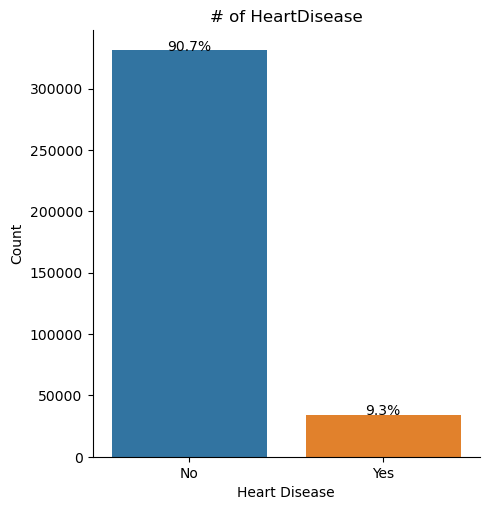

In [10]:
ax = sns.catplot(x= 'HeartDisease'
           ,kind = 'count'
           ,data = df)

plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('# of HeartDisease')
total_count = len(df)
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha='center')

plt.show()



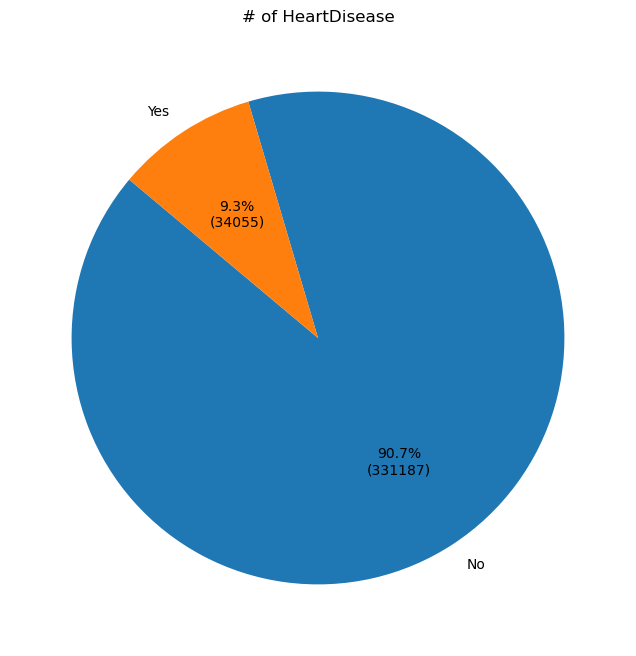

In [11]:
heart_disease_counts = df['HeartDisease'].value_counts()

# Function to display both count and percentage
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct=lambda pct: func(pct, heart_disease_counts), startangle=140)
plt.title('# of HeartDisease')

# Display the pie chart
plt.show()

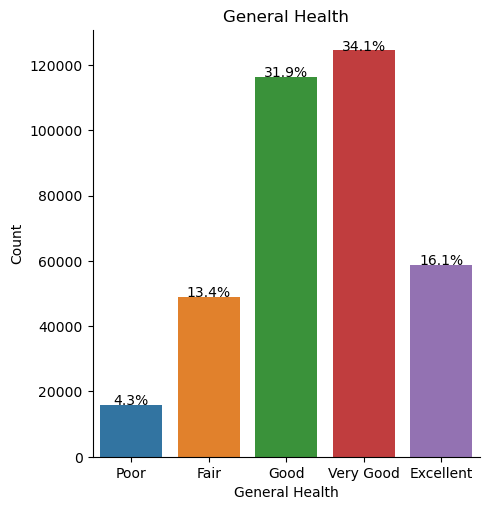

In [12]:
health_order = ['Poor','Fair','Good','Very Good', 'Excellent']
ax = sns.catplot(x= 'GeneralHealth'
           ,kind = 'count'
           ,data = df
           ,order = health_order)
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('General Health')
total_count = len(df)
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha='center')

plt.show()


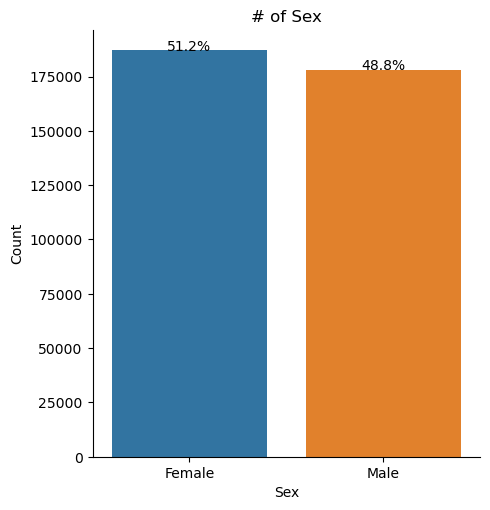

In [13]:
ax = sns.catplot(x= 'Sex'
           ,kind = 'count'
           ,data = df)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('# of Sex')
total_count = len(df)
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha='center')

plt.show()

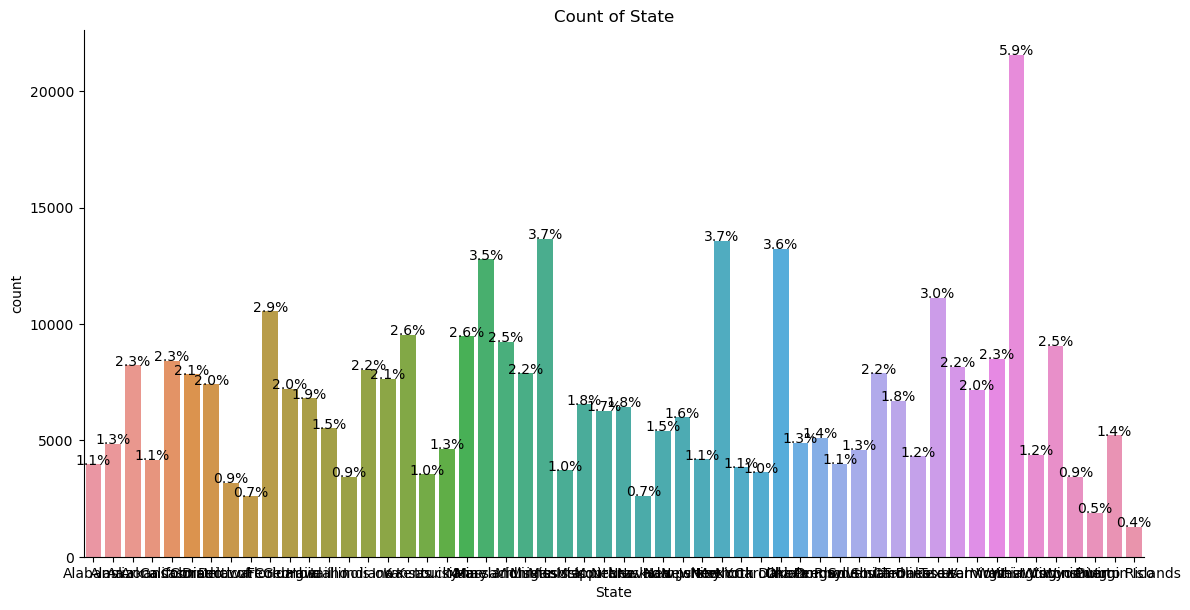

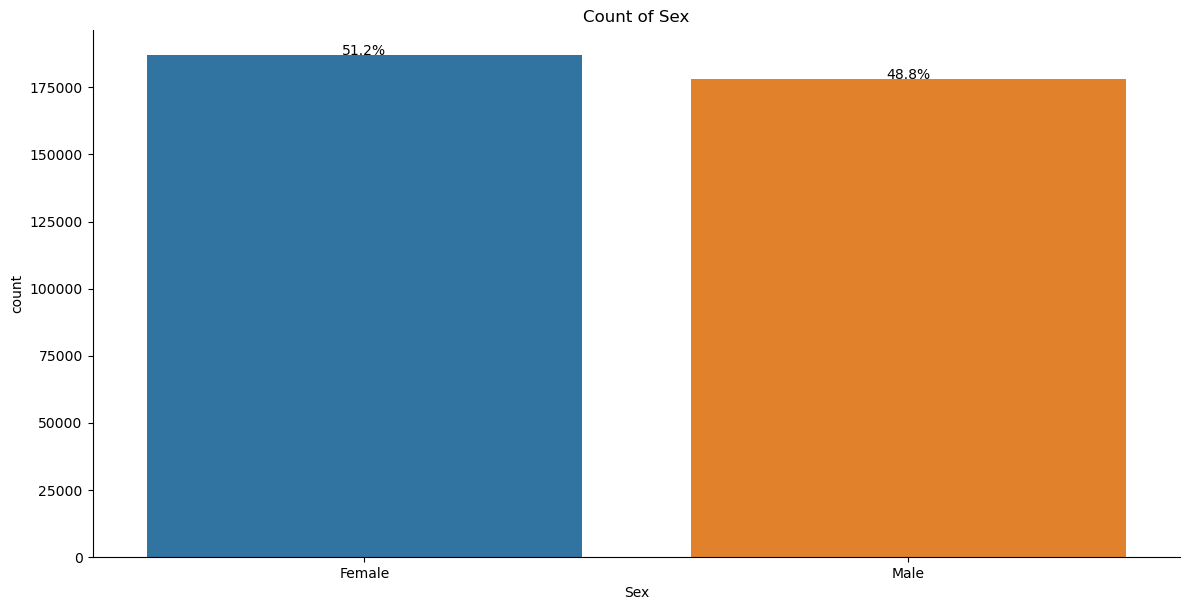

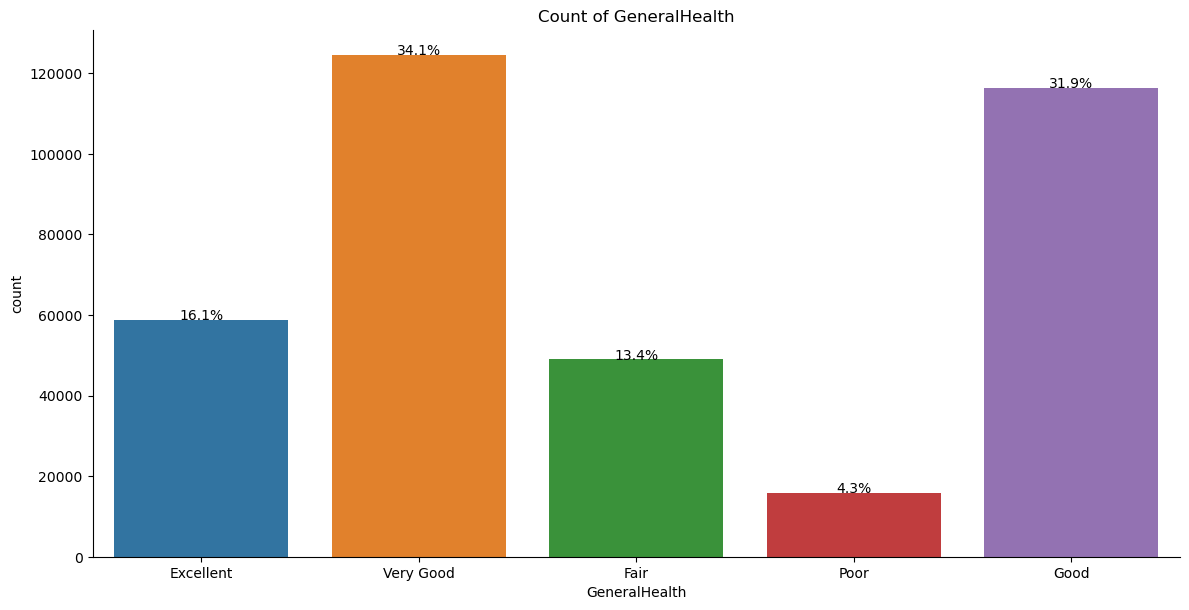

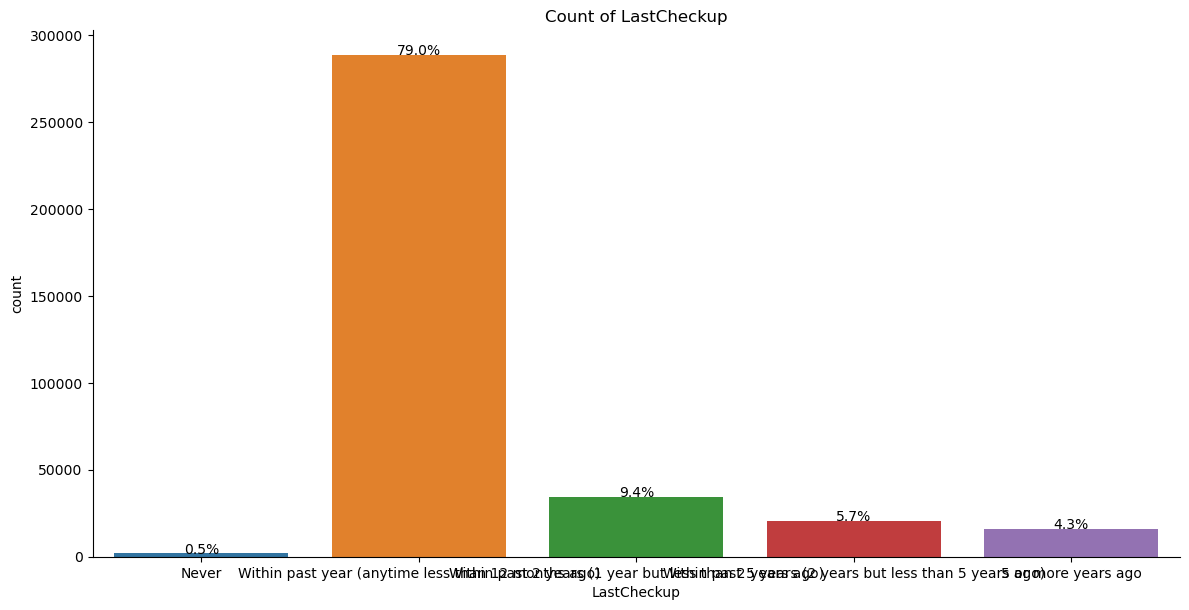

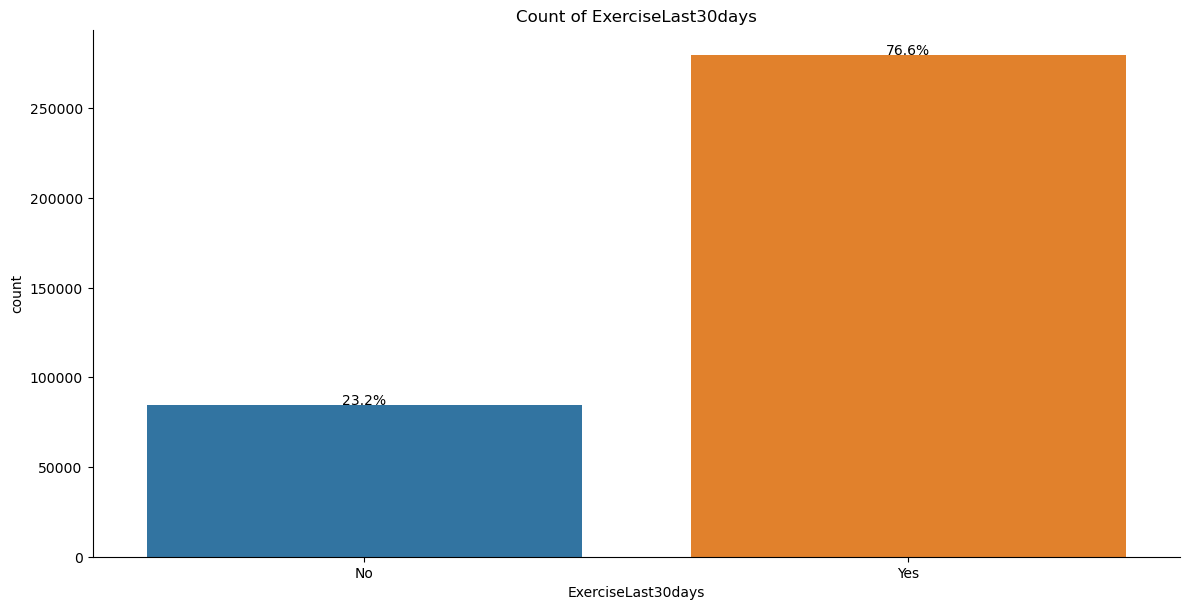

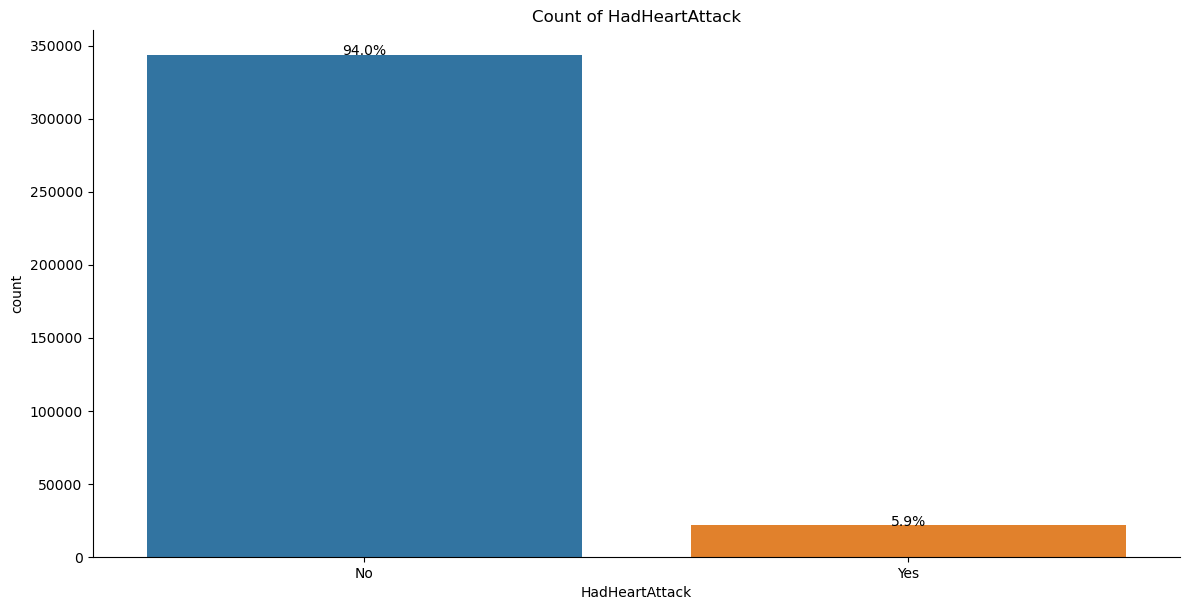

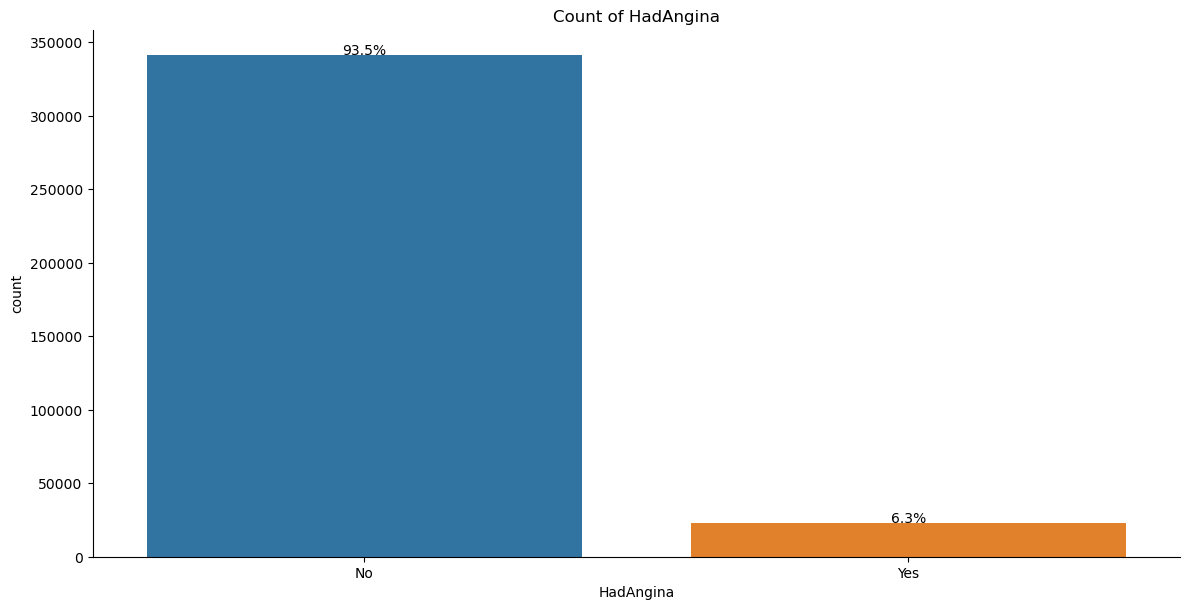

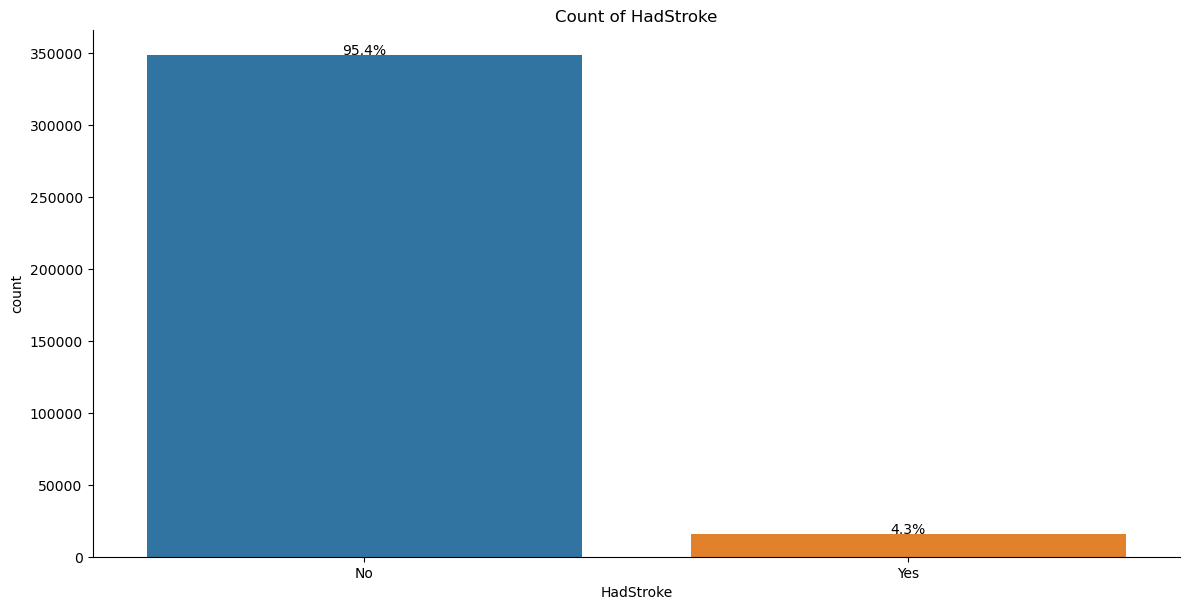

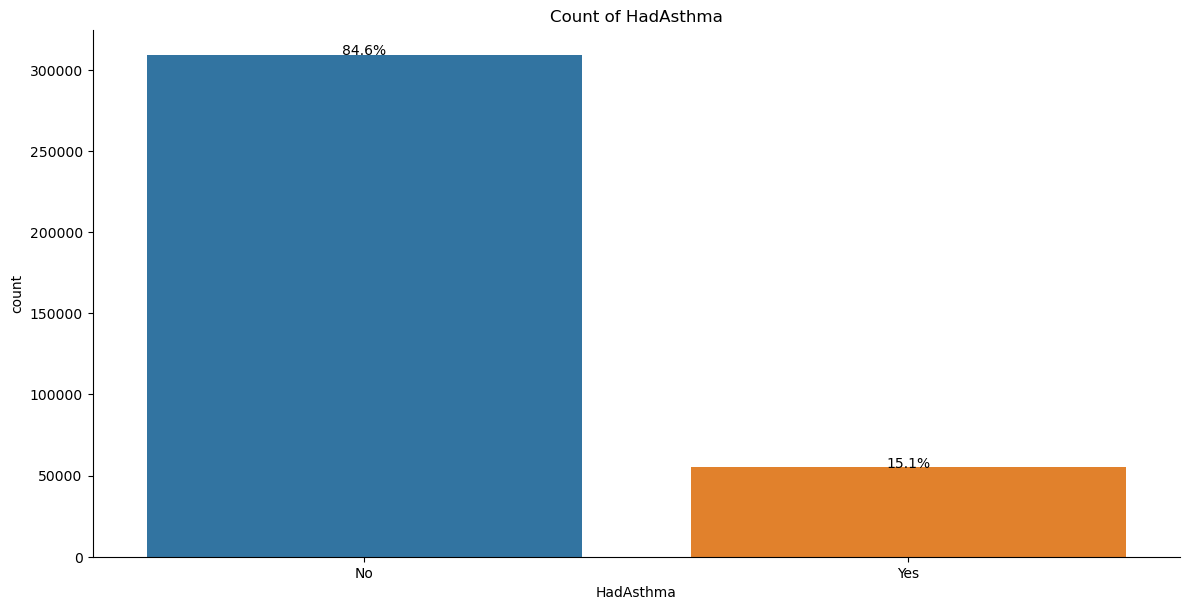

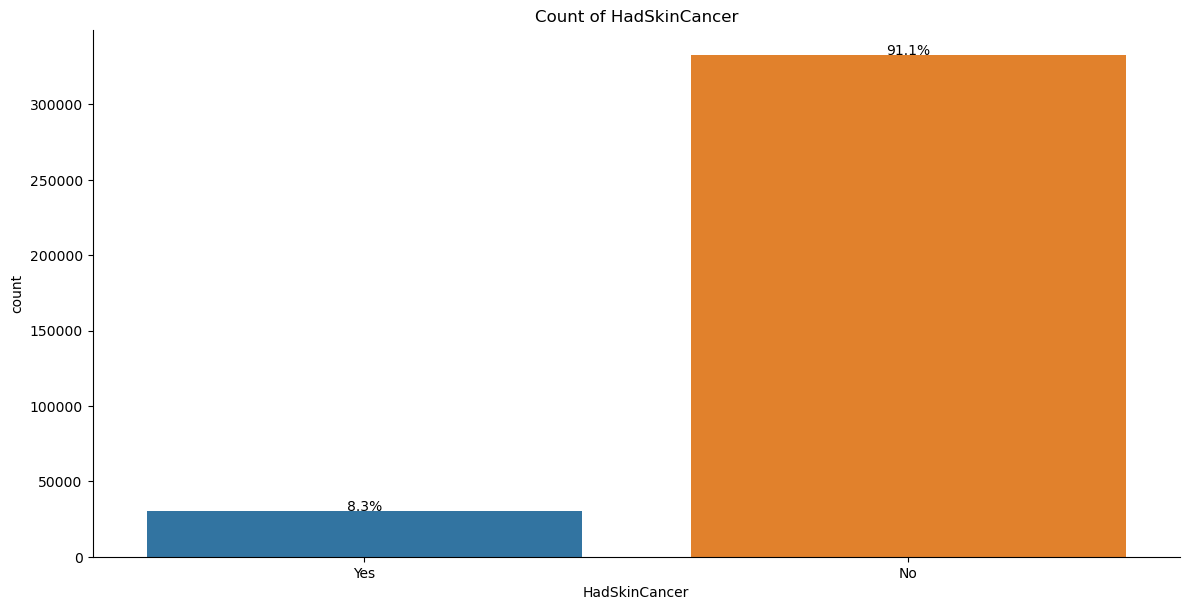

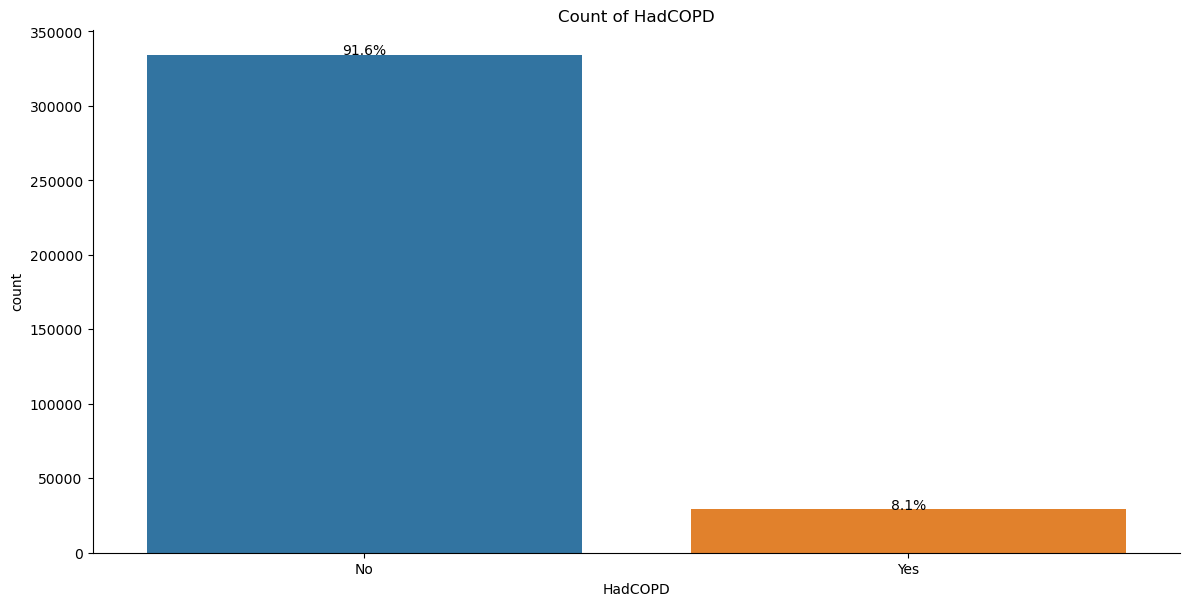

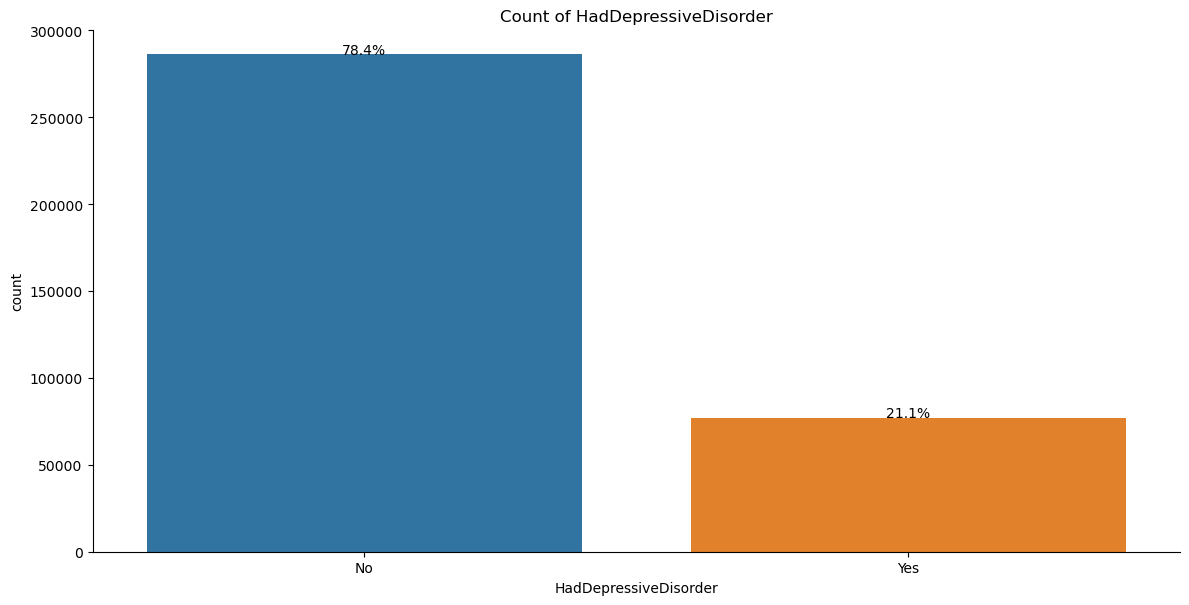

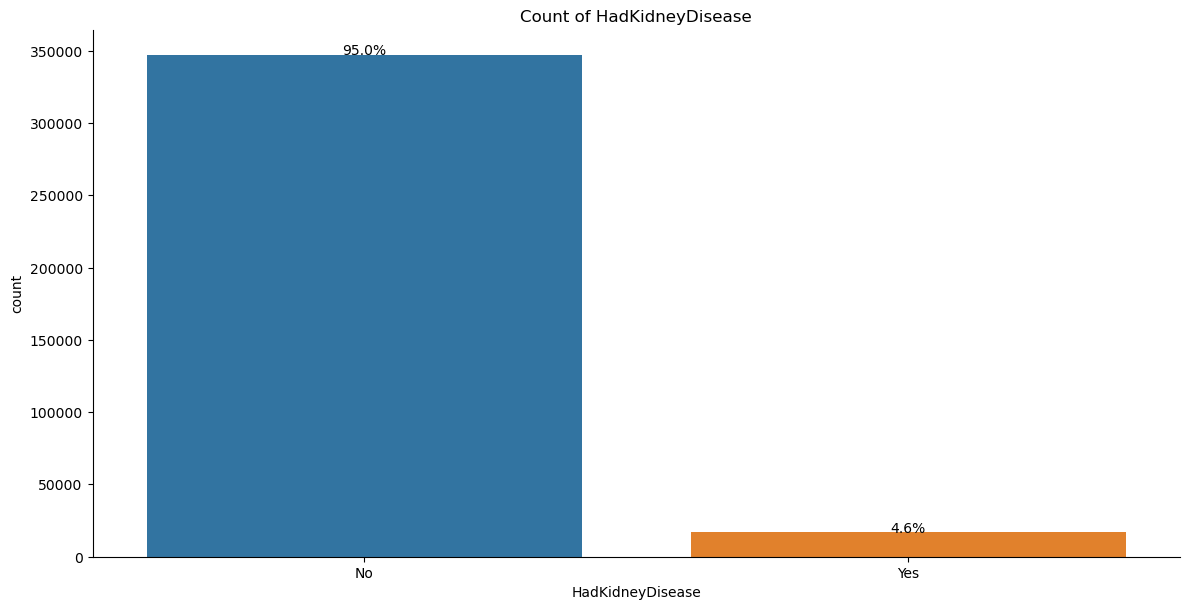

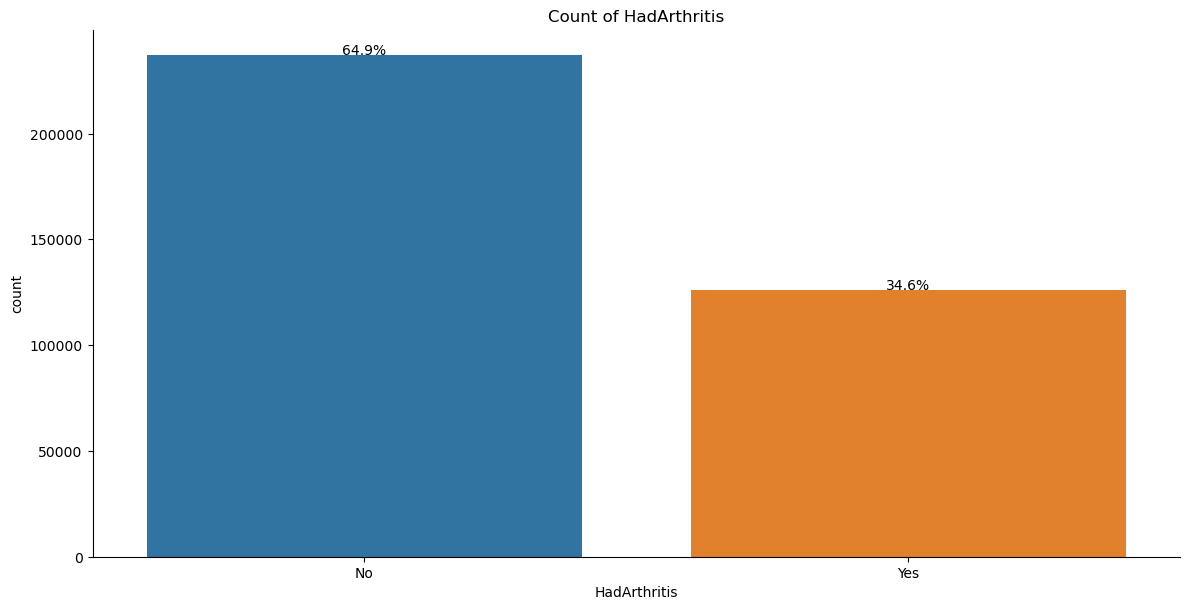

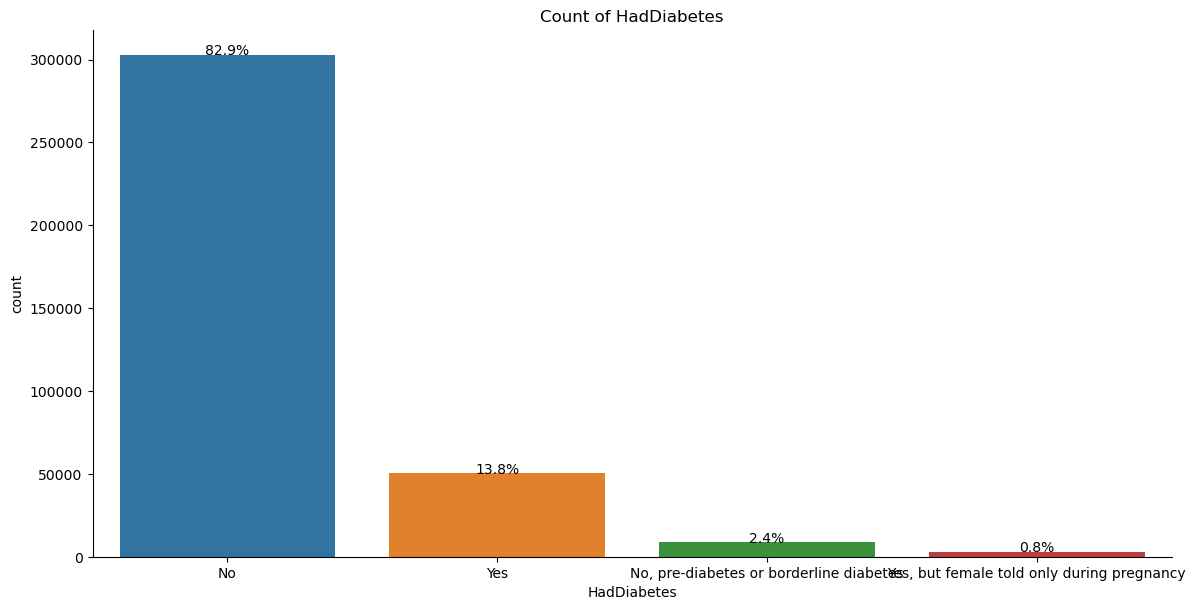

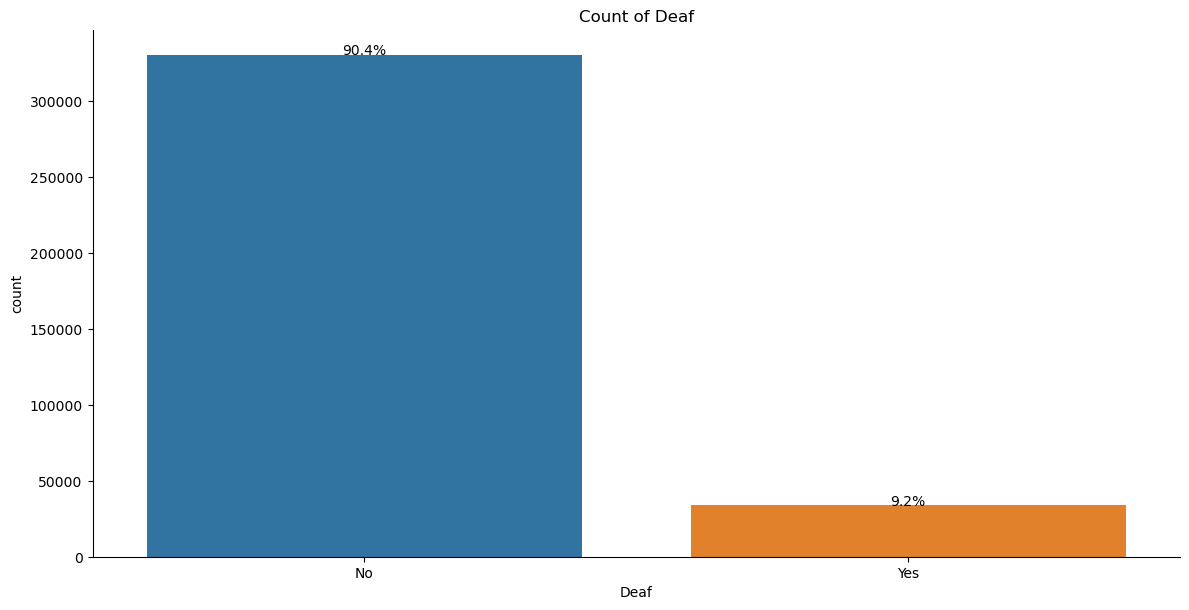

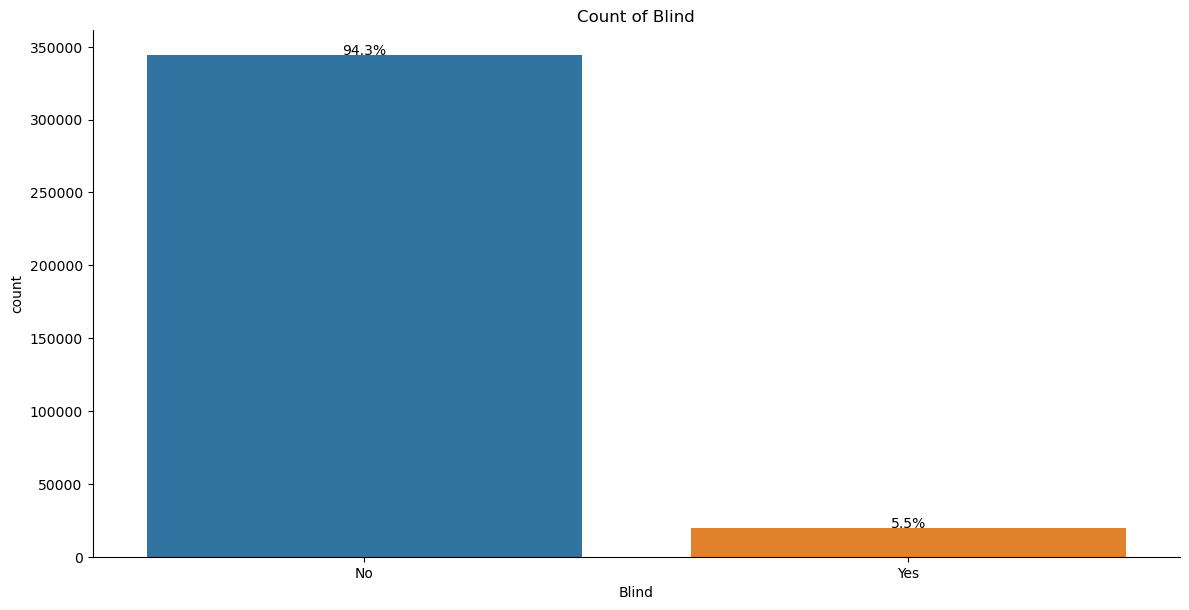

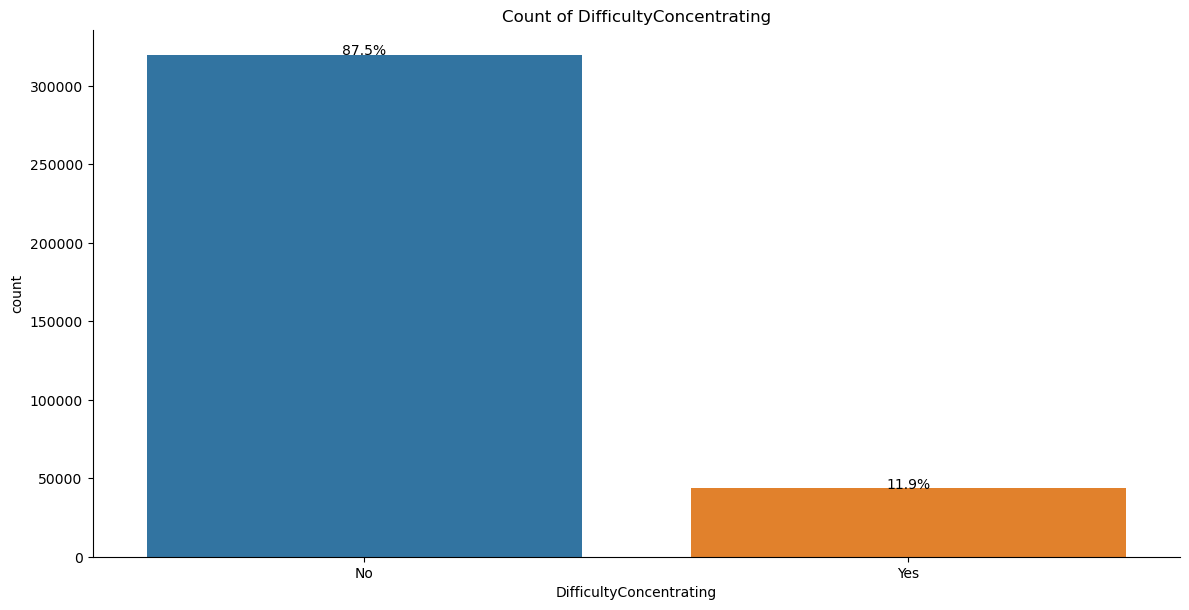

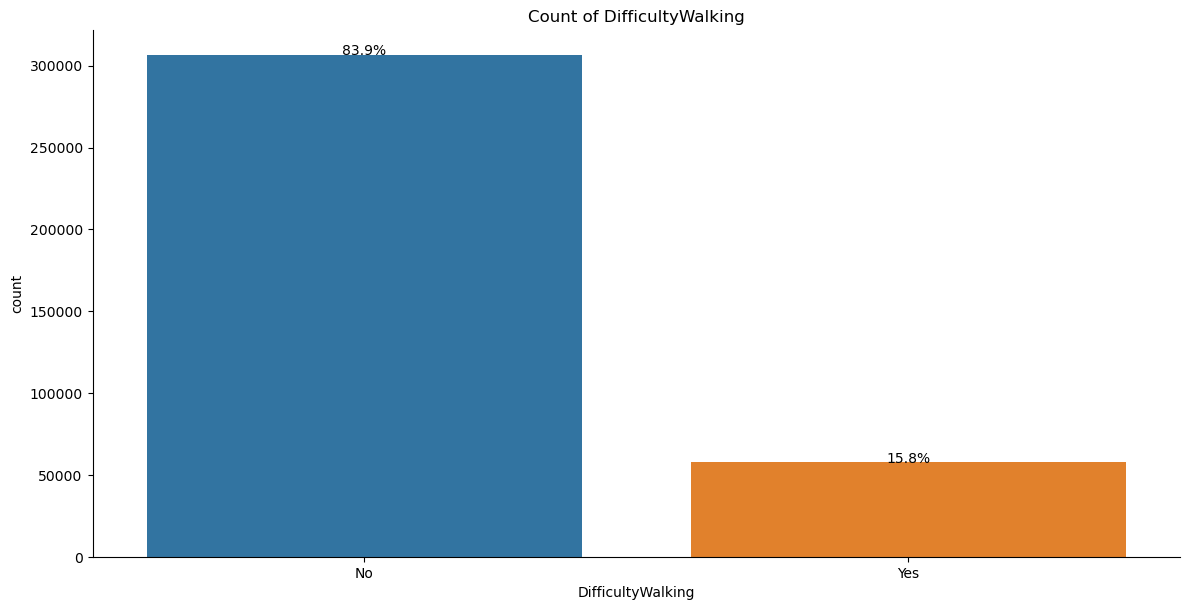

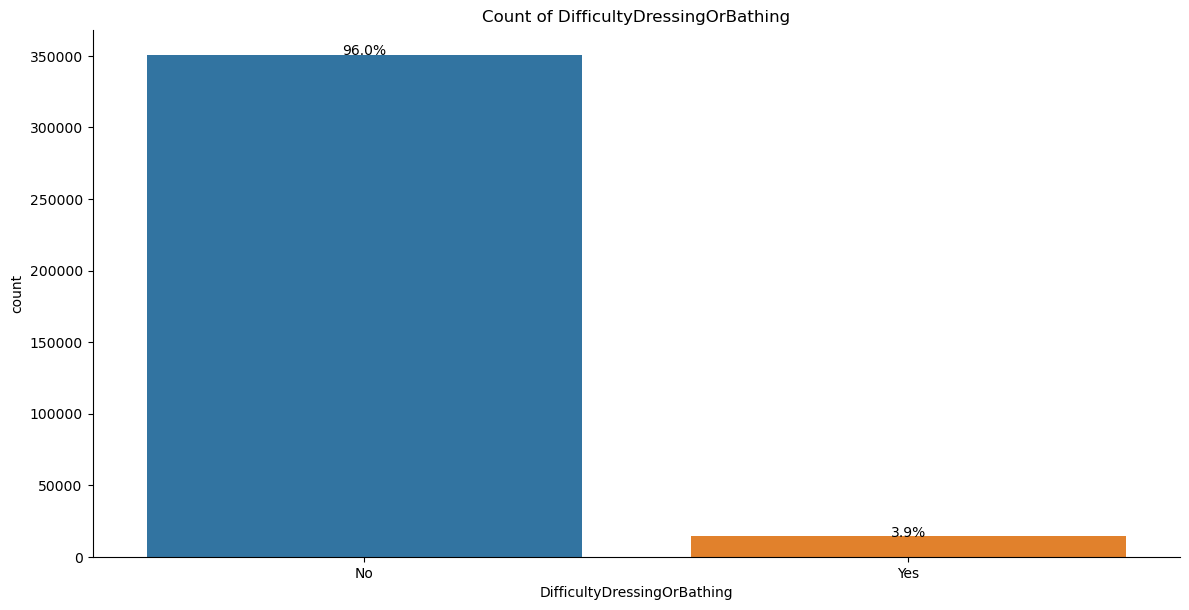

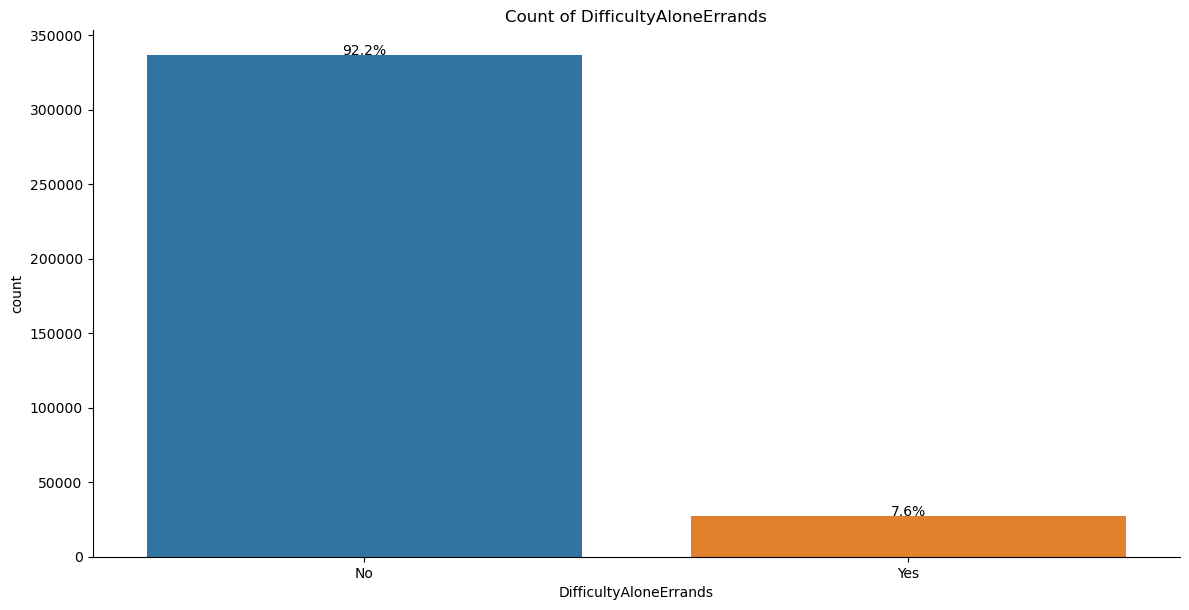

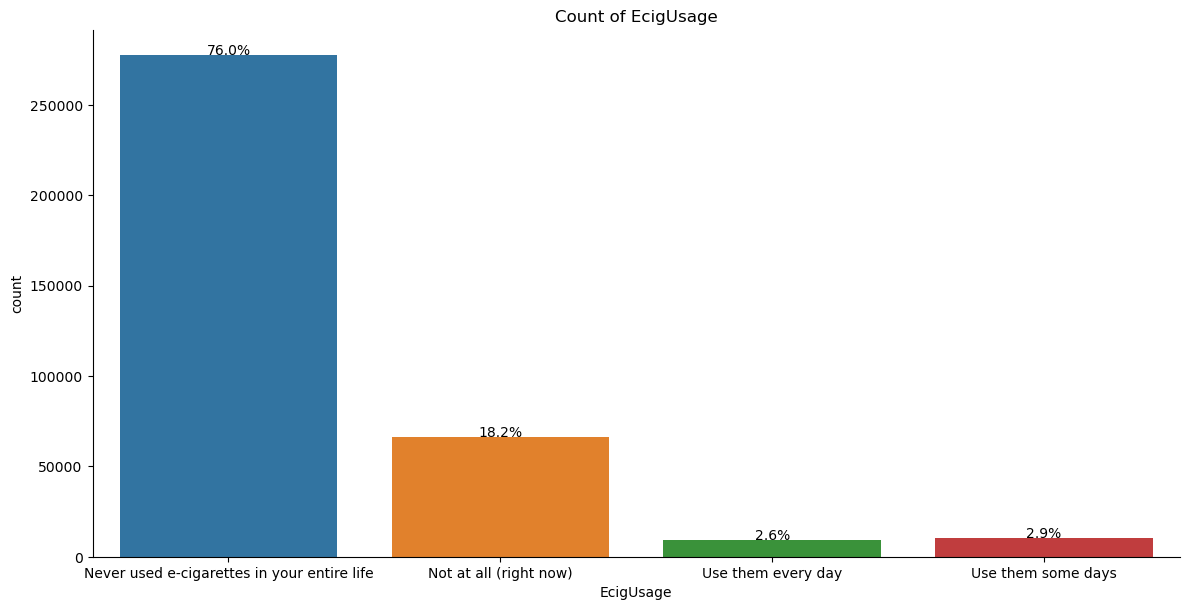

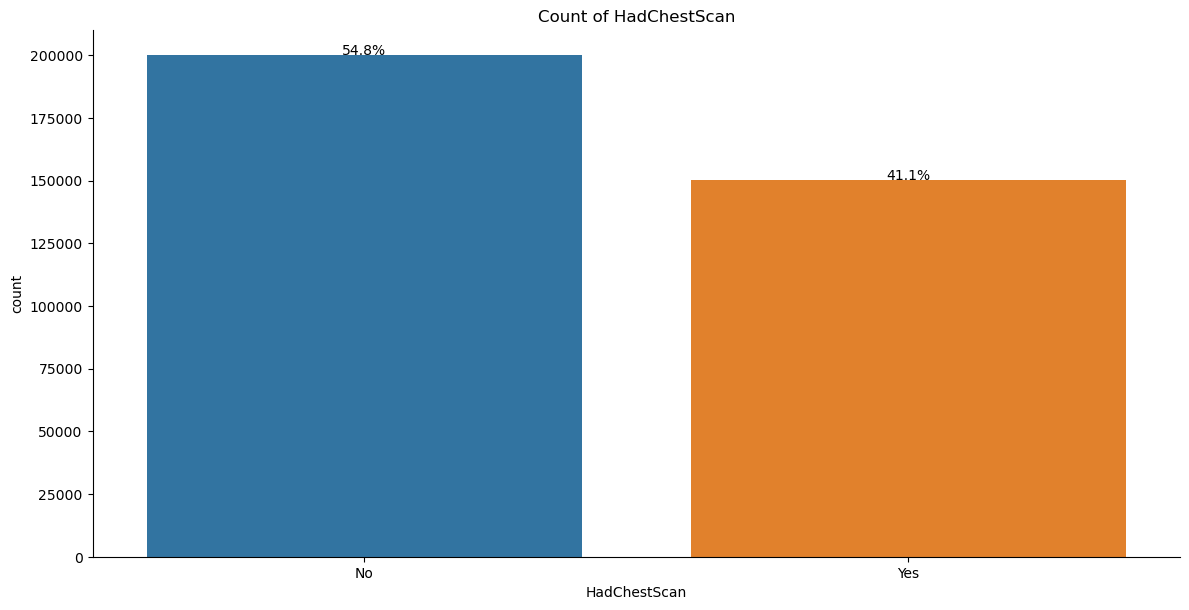

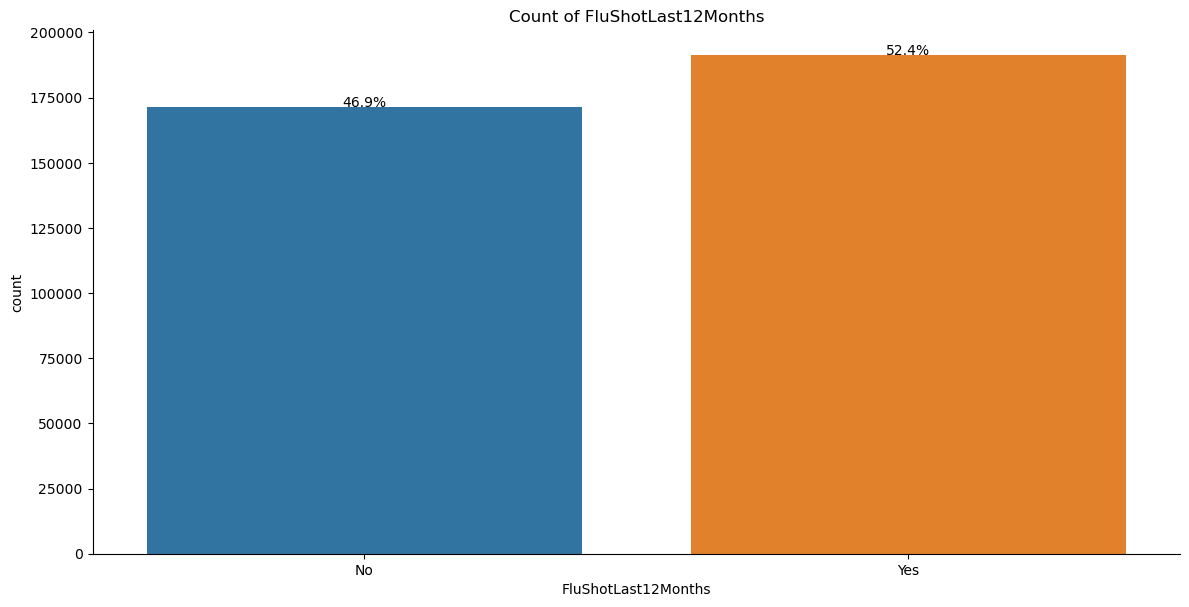

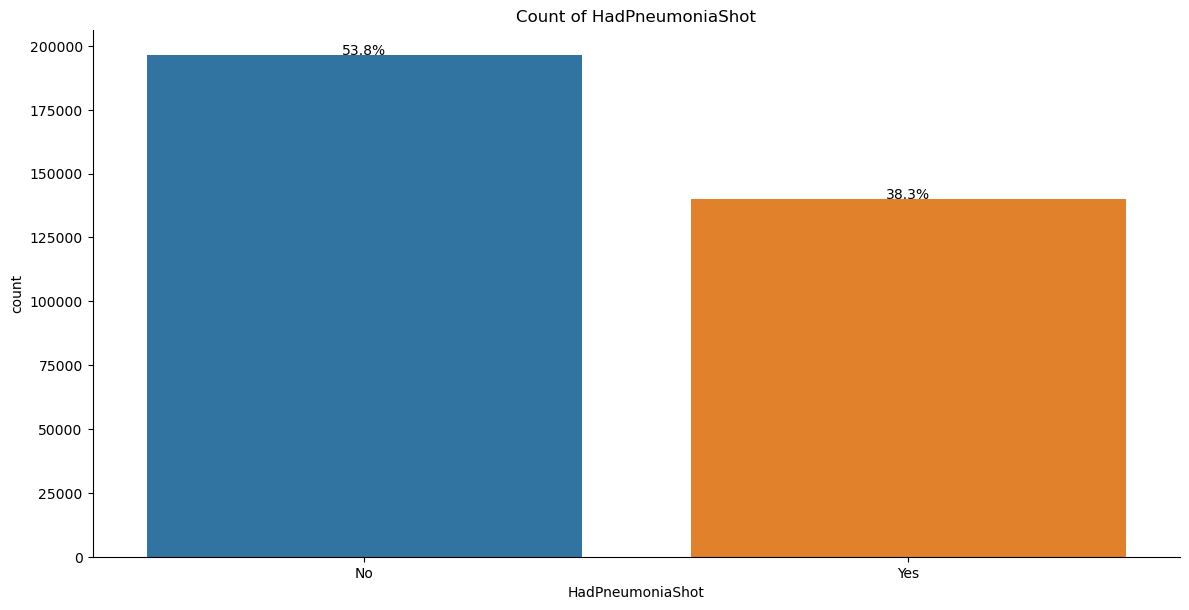

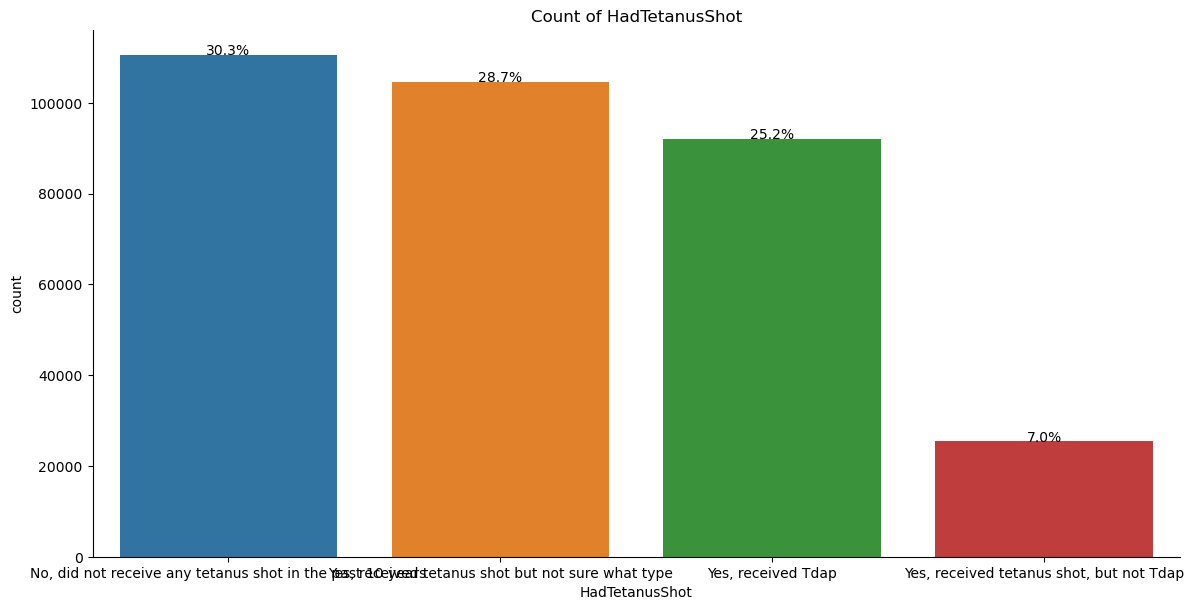

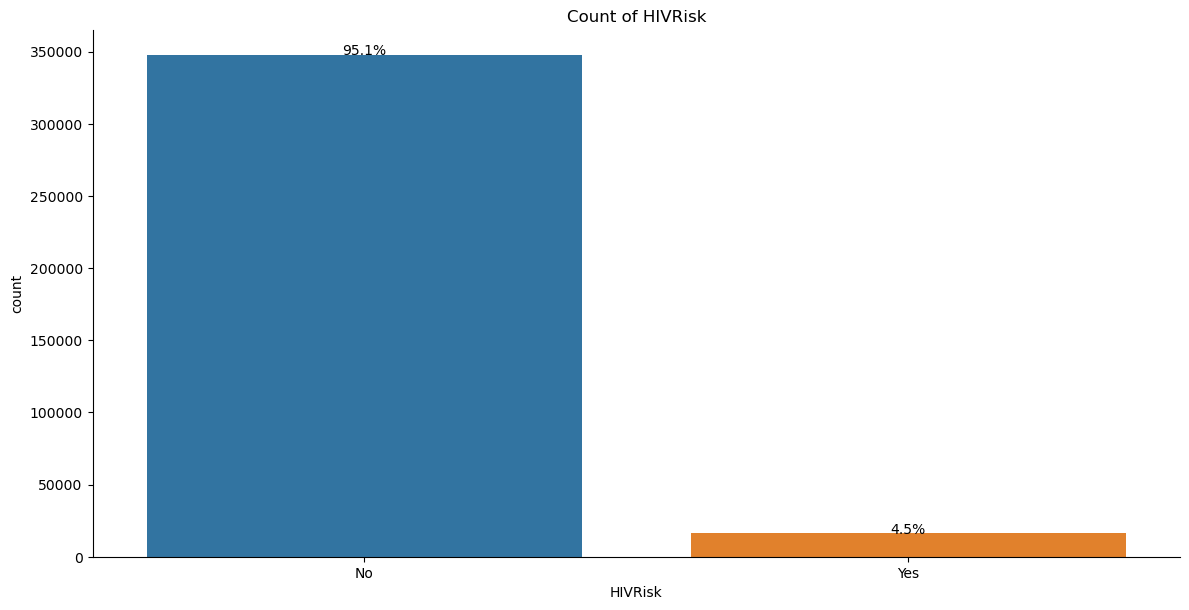

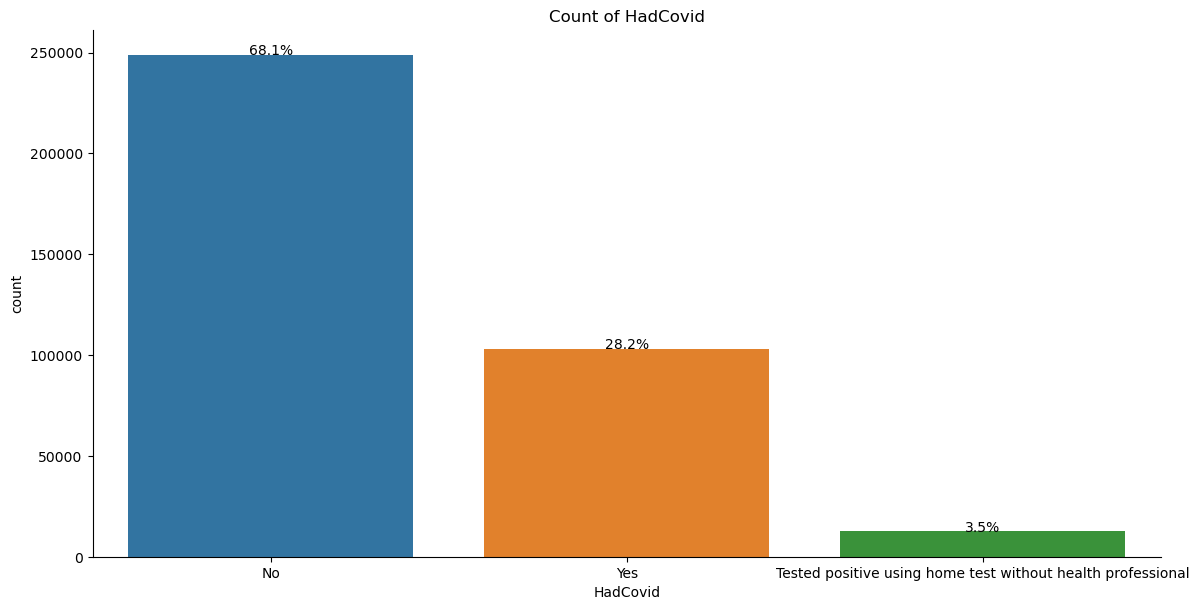

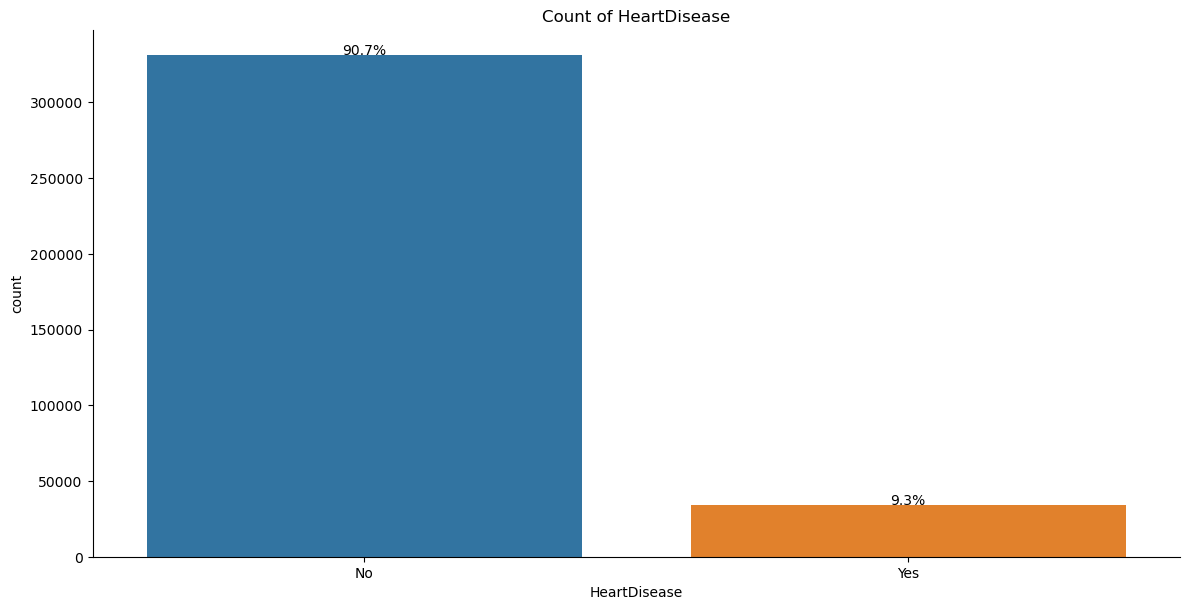

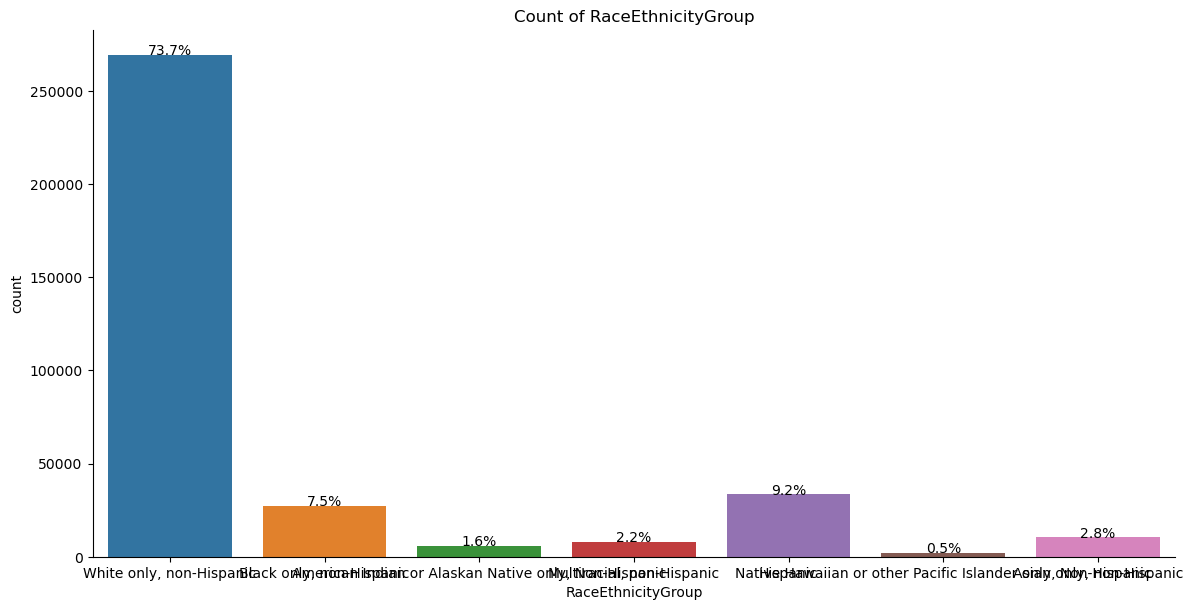

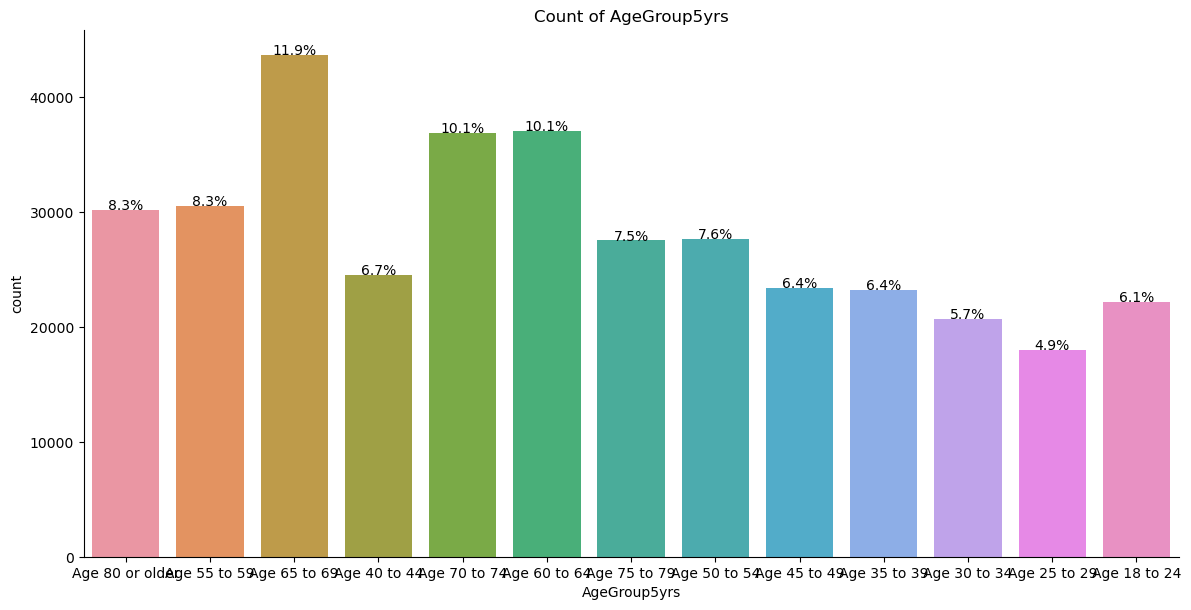

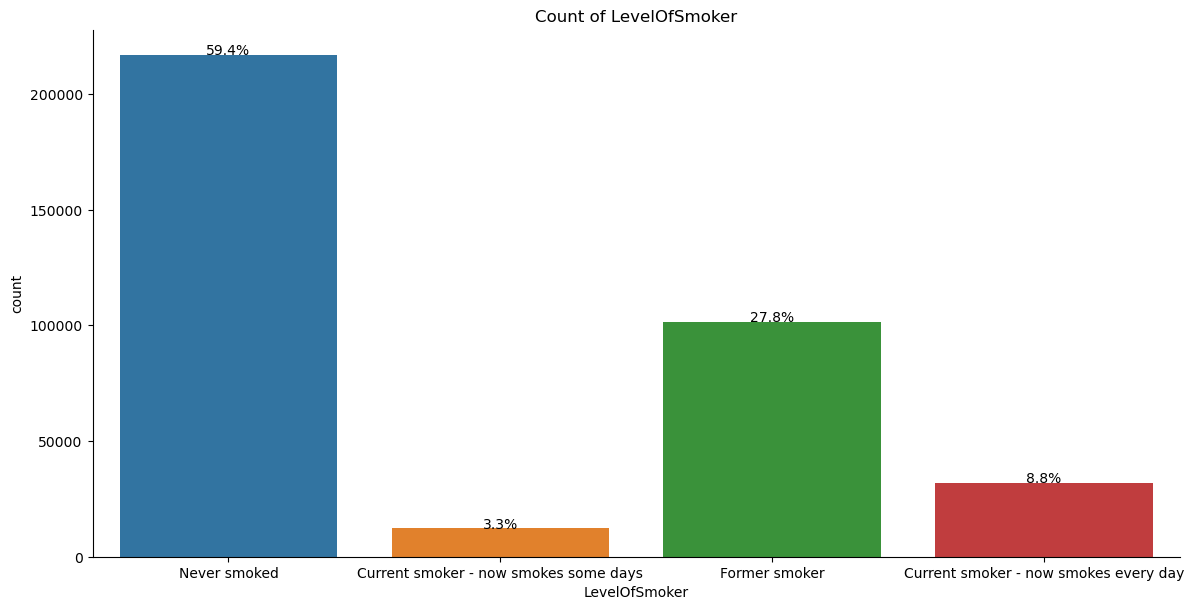

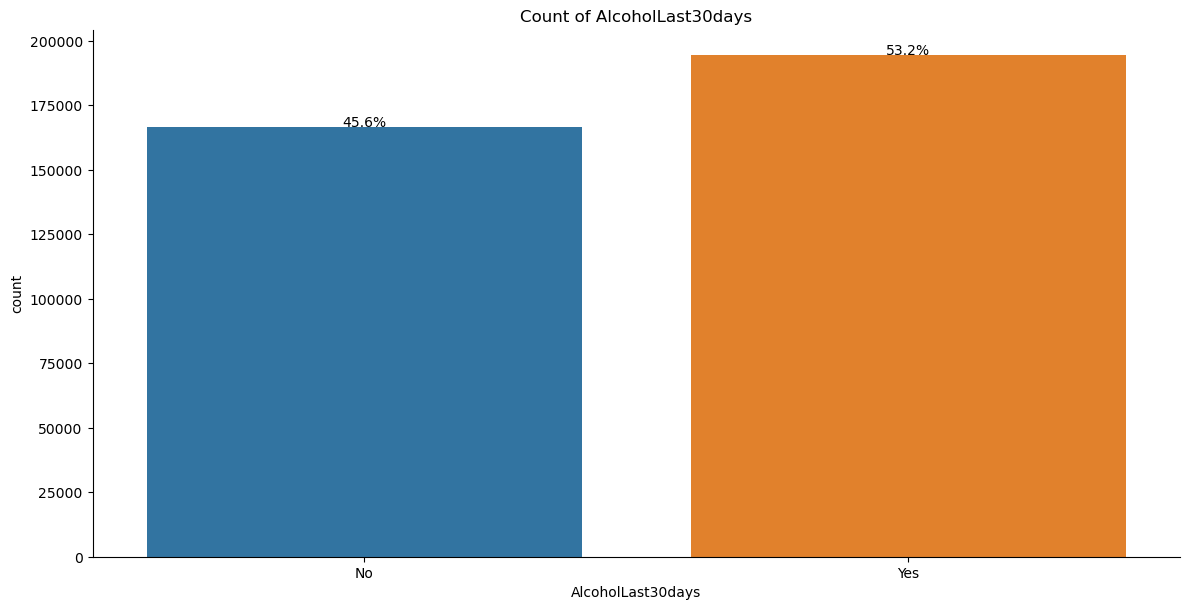

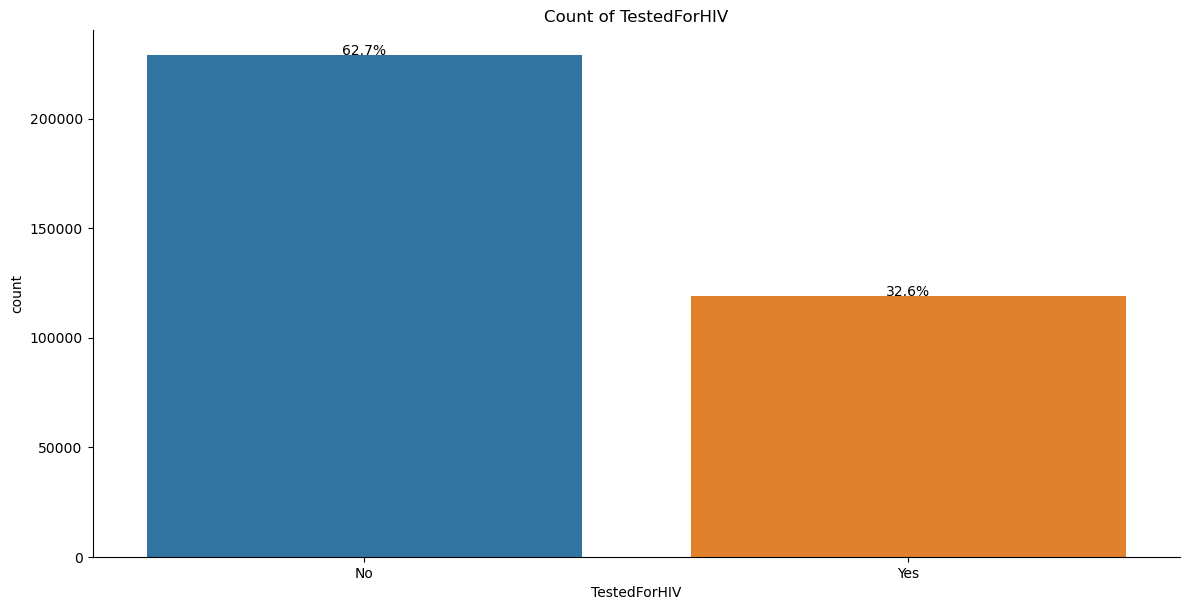

In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

#exclude = ['State',]
#categorical_columns = [col for col in categorical_columns if col not in exclude]

# Create catplot with histograms for each categorical column
for column in categorical_columns:
    ax = sns.catplot(x=column, kind='count', data=df, height=6, aspect=2)
    plt.title(f'Count of {column}')
    total_count = len(df)
    for p in ax.ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.ax.text(x, y, percentage, ha='center')
    plt.show()

### Visualization of Categorical Features

columns = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis','Deaf', 'Blind',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingOrBathing', 'DifficultyAloneErrands','HadTetanusShot', 'HIVRisk']

#### basic demographics

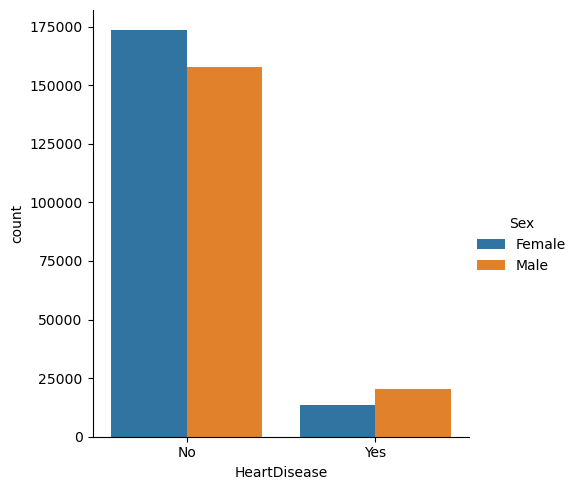

In [15]:
sns.catplot(x= 'HeartDisease'
           ,kind = 'count'
           ,data = df
           ,hue = 'Sex')


plt.show()

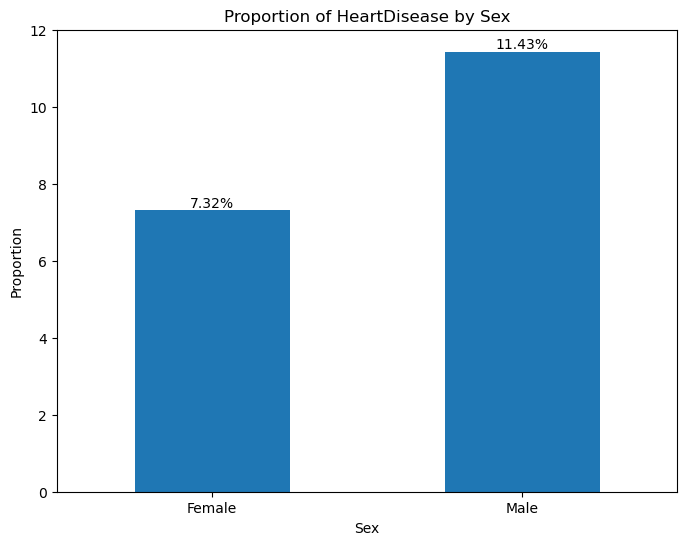

In [16]:
# Calculate the proportions of HeartDisease = 'Yes' for each category of 'Sex'
heart_disease_yes_proportions = df[df['HeartDisease'] == 'Yes'].groupby('Sex').size() / df.groupby('Sex').size() * 100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_yes_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_yes_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

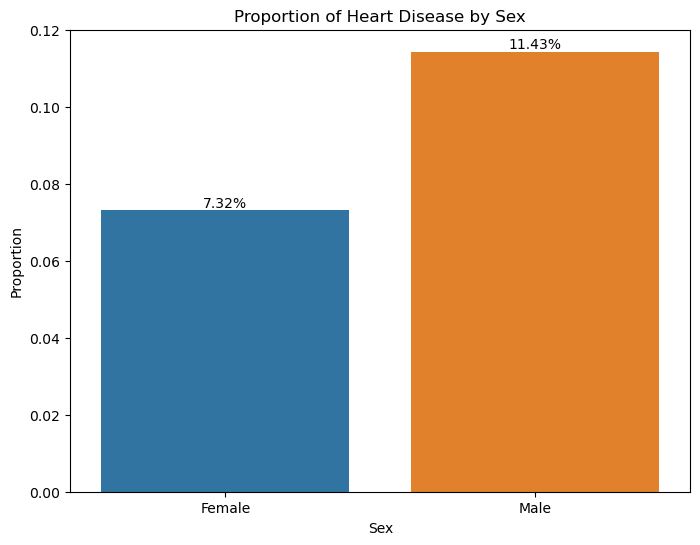

In [17]:
# Calculate the count of HeartDisease = 'Yes' for each category of 'Sex'
heart_disease_yes_counts = df[df['HeartDisease'] == 'Yes'].groupby('Sex').size()

# Calculate the proportions of HeartDisease = 'Yes' for each category of 'Sex'
sex_proportions = heart_disease_yes_counts / df.groupby('Sex').size()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sex_proportions.index, y=sex_proportions.values)
plt.title('Proportion of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')

# Add percentage labels on top of each bar
for i, v in enumerate(sex_proportions.values):
    ax.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.show()

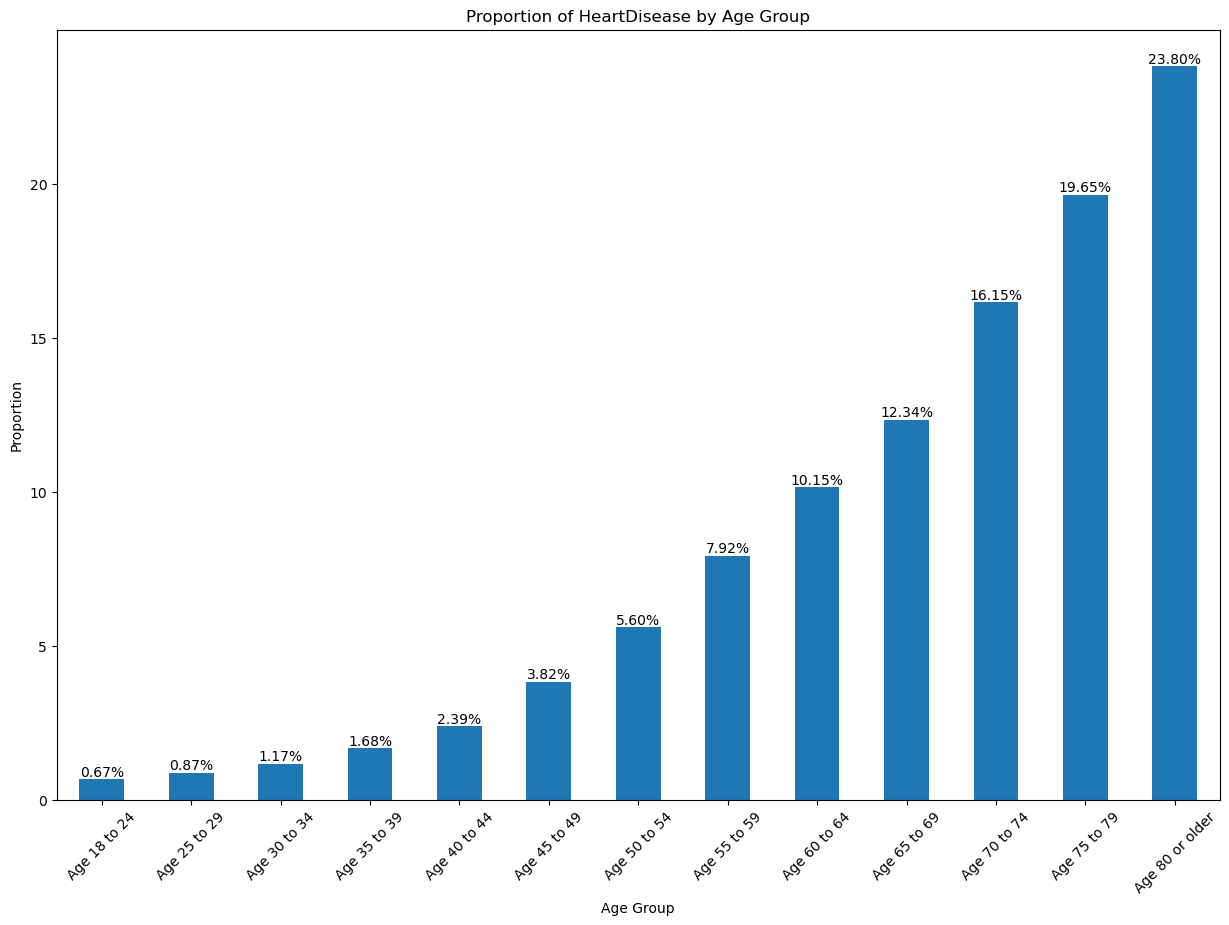

In [18]:
# Filter the DataFrame to include only rows where HeartDisease is 'Yes'
df_yes_heart_disease = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('AgeGroup5yrs').size() / df.groupby('AgeGroup5yrs').size() * 100

# Plot
plt.figure(figsize=(15, 10))
age_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

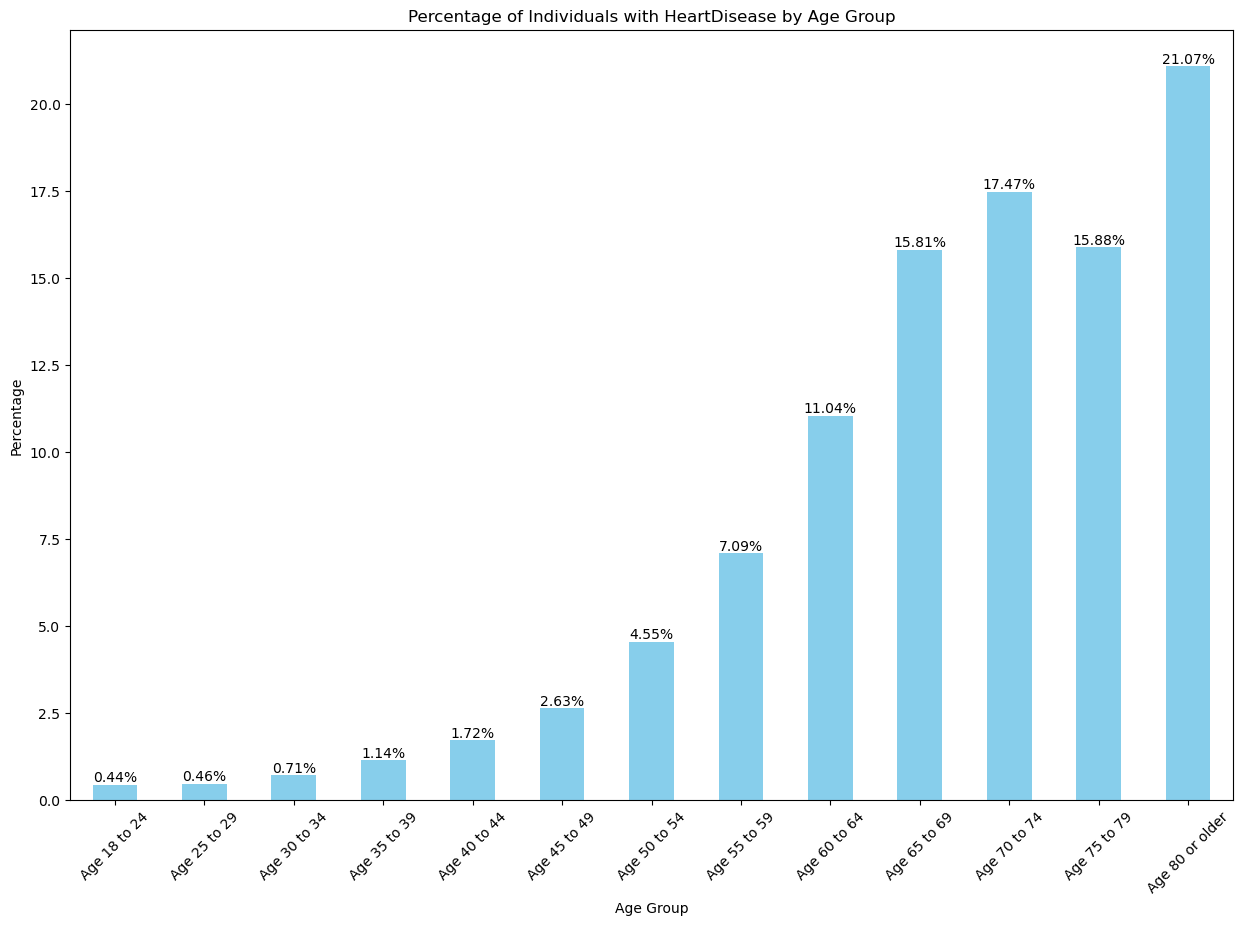

In [19]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_yes_heart_disease = df[df['HeartDisease'] == 'Yes']

# Calculate the total number of individuals with HeartDisease = 'Yes'
total_heart_disease_yes = df_yes_heart_disease.shape[0]

# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('AgeGroup5yrs').size() / total_heart_disease_yes * 100

# Plot
plt.figure(figsize=(15, 10))
age_proportions.plot(kind='bar', color = 'skyblue')
plt.title('Percentage of Individuals with HeartDisease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

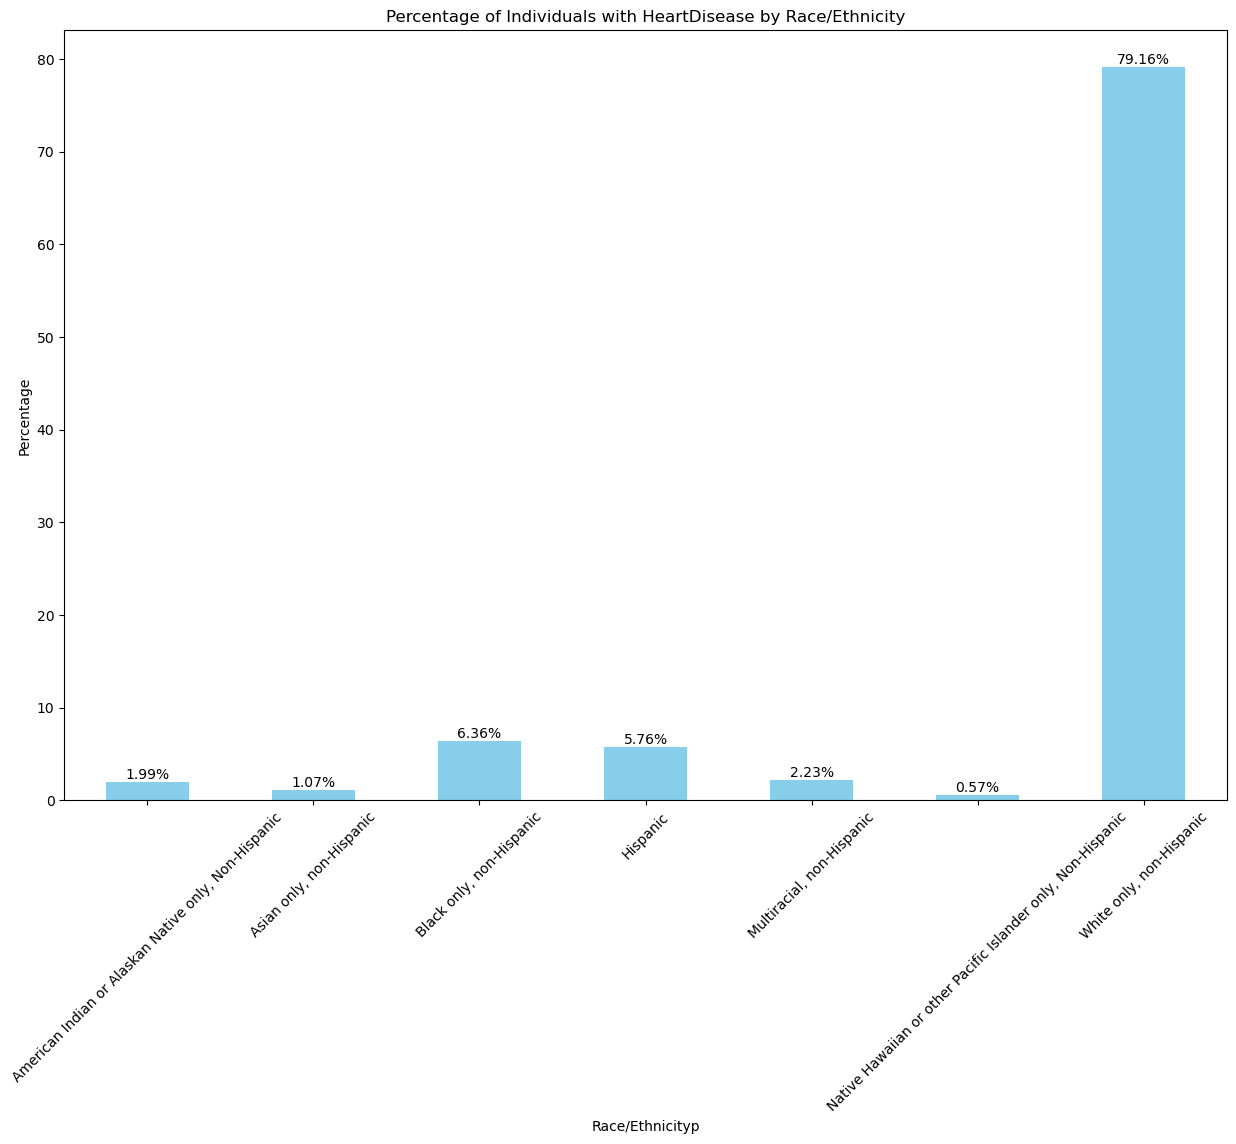

In [20]:

# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('RaceEthnicityGroup').size() / total_heart_disease_yes * 100

# Plot
plt.figure(figsize=(15, 10))
age_proportions.plot(kind='bar', color = 'skyblue')
plt.title('Percentage of Individuals with HeartDisease by Race/Ethnicity')
plt.xlabel('Race/Ethnicityp')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

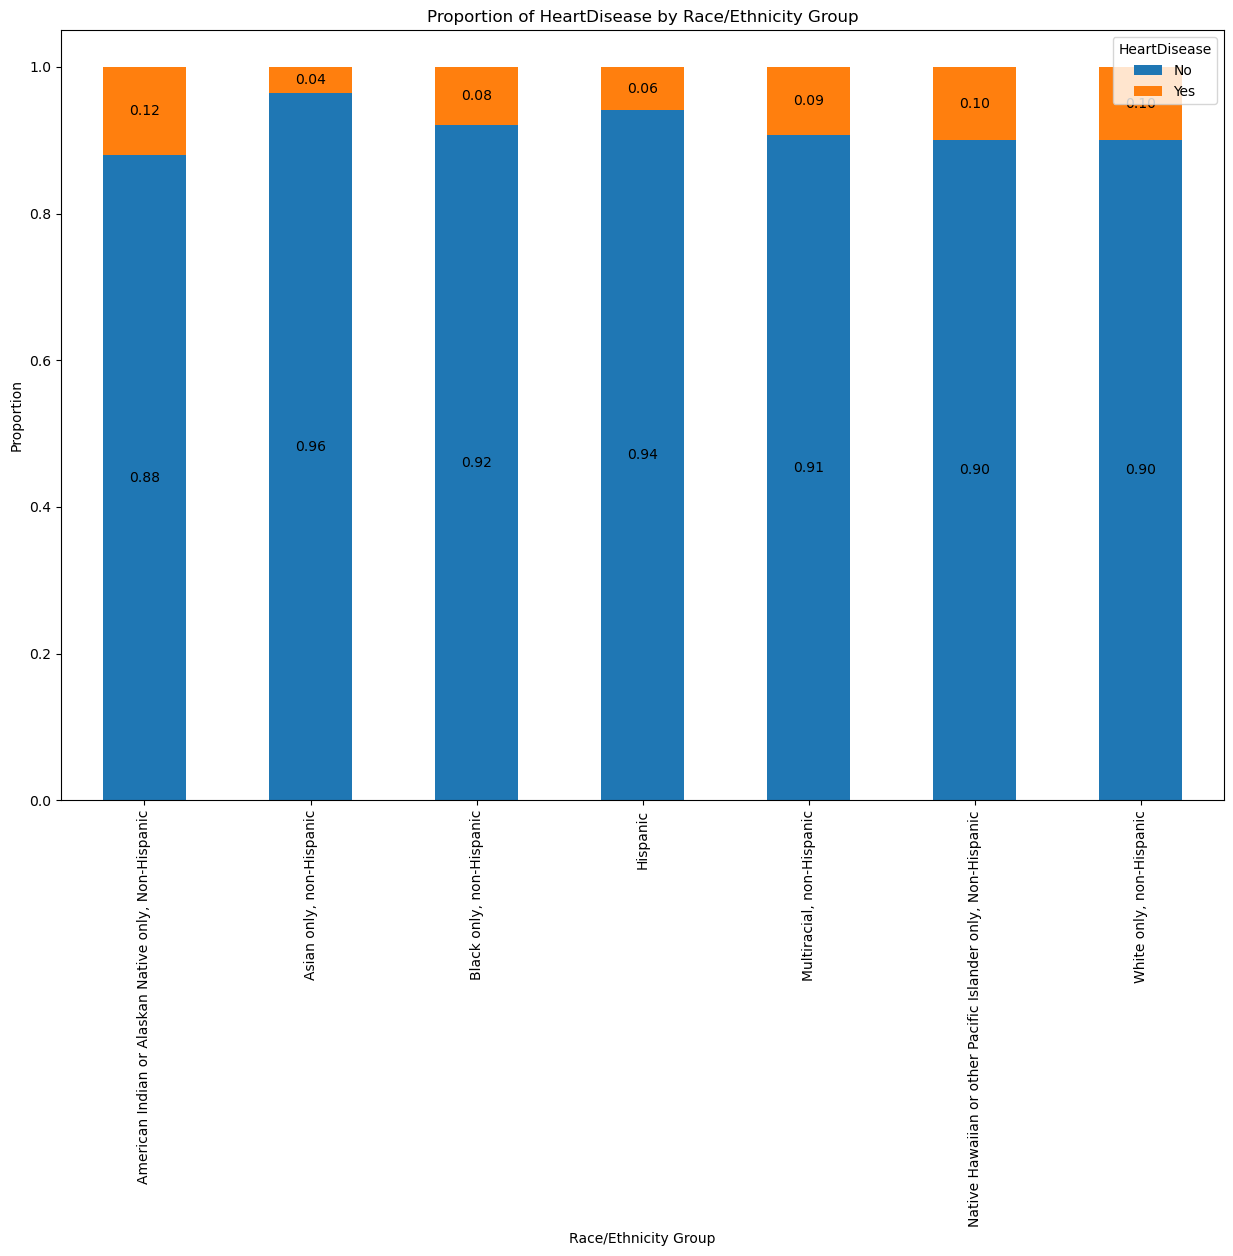

In [21]:
# Calculate proportions
race_proportions = df.groupby('RaceEthnicityGroup')['HeartDisease'].value_counts(normalize=True).unstack()

# Reorder the index to match the specified order
# (Optional: If you have a specific order in mind, you can reorder the index here)
# proportions = proportions.reindex(['order1', 'order2', ...])

# Plot
ax = race_proportions.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Proportion of HeartDisease by Race/Ethnicity Group')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Proportion')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.legend(title='HeartDisease', loc='upper right')

# Add numerical values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

plt.show()

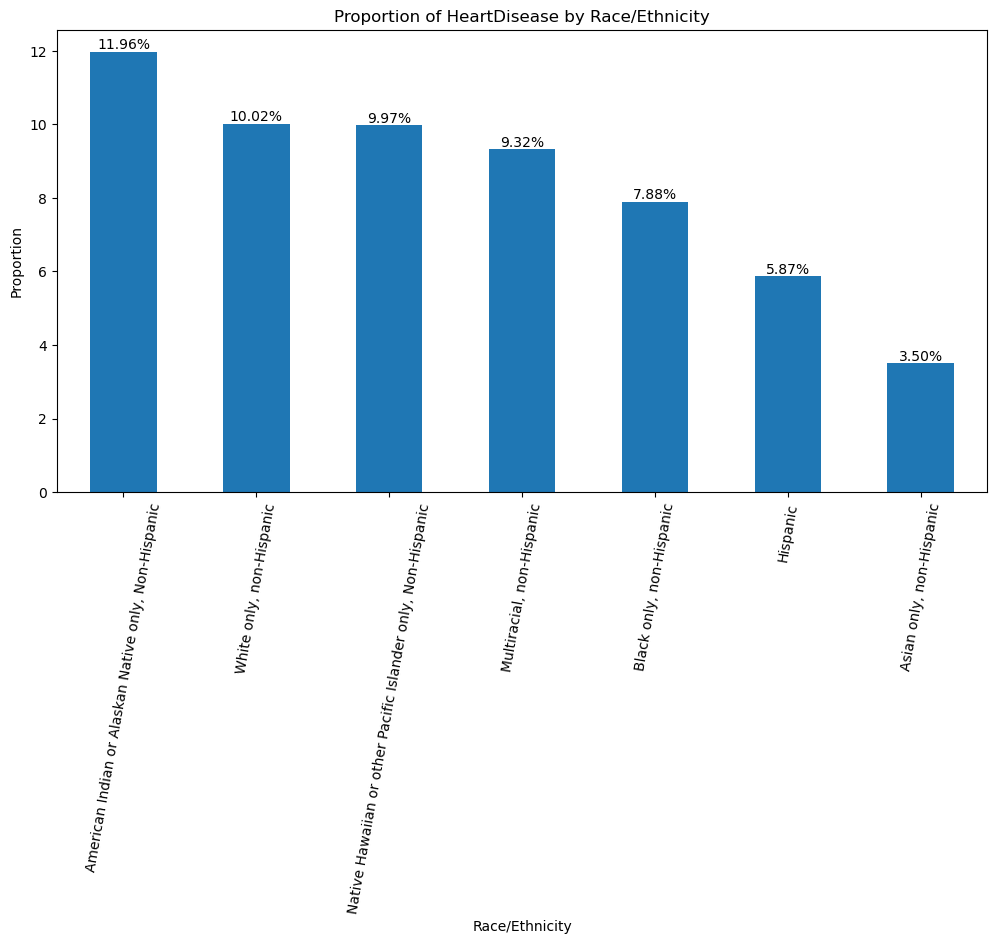

In [22]:
# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('RaceEthnicityGroup').size() / df.groupby('RaceEthnicityGroup').size() * 100

# Sort the proportions in descending order
age_proportions = age_proportions.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
age_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')
plt.xticks(rotation=80)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#### Distribution of comorbidities with Heart Disease

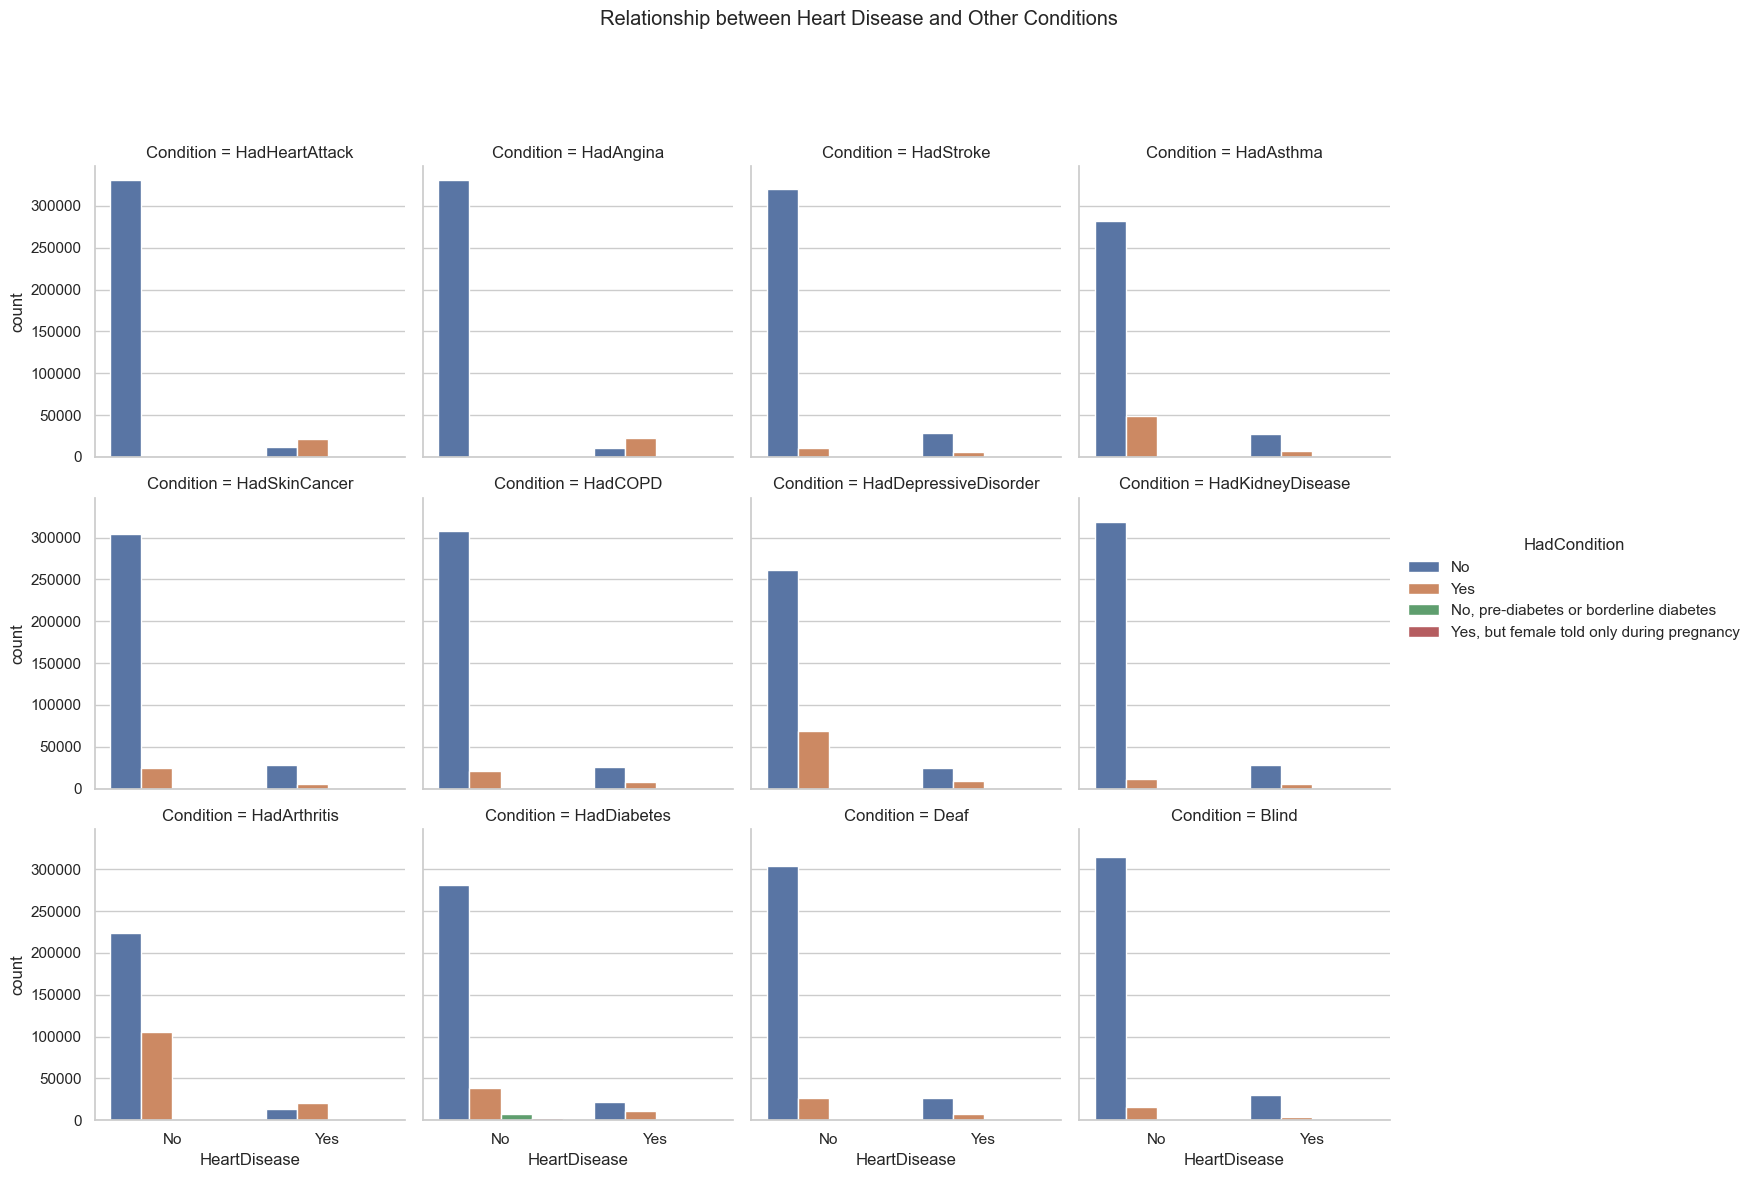

In [23]:
# Melt the DataFrame
conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'Deaf', 'Blind']
melted_data = df.melt(id_vars='HeartDisease', value_vars=conditions, var_name='Condition', value_name='HadCondition')

# Plotting using Seaborn
sns.set(style="whitegrid")
sns.catplot(x='HeartDisease', hue='HadCondition', col='Condition', data=melted_data, kind='count', col_wrap = 4,  aspect=0.9, height=4)

# Adding titles and labels
plt.suptitle('Relationship between Heart Disease and Other Conditions')
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()



It makes sense that heart attack and angina are linked to heart disease,but it's interesting to see that arthritis is common in those who have heart disease, probably due to age, as seen before in age alot of people with heart diseases are found in age group 60+, which is the same for arthritis patients

In [24]:
df['Smoked'] = df['LevelOfSmoker'].replace(['Current smoker - now smokes some days', 'Former smoker', 'Current smoker - now smokes every day'], 'Smoked')

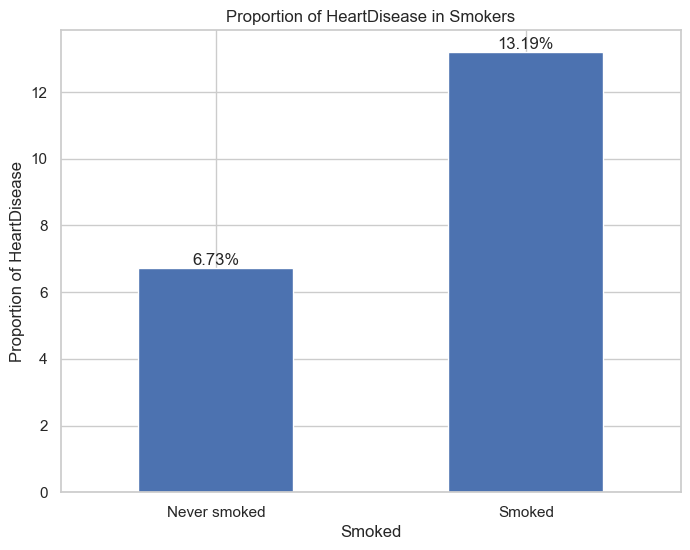

In [25]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_heart_disease_yes = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df_heart_disease_yes.groupby('Smoked').size() / df.groupby('Smoked').size() *100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease in Smokers')
plt.xlabel('Smoked')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

Chi-squared test statistic: 4299.504077909051
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[196622.36582569  20231.63417431]
 [132360.63417431  13619.36582569]]


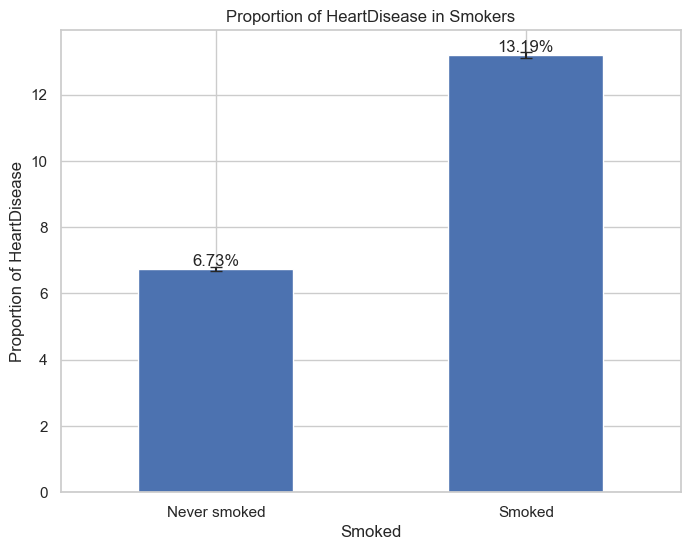

There is a significant association between smoking and heart disease (p < 0.05).


In [26]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Smoked'], df['HeartDisease'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df[df['HeartDisease'] == 'Yes'].groupby('Smoked').size() / df.groupby('Smoked').size() * 100

# Calculate the standard error for the proportions
n_smoked = df.groupby('Smoked').size()
se = np.sqrt(heart_disease_proportions * (100 - heart_disease_proportions) / n_smoked)

# Plot
plt.figure(figsize=(8, 6))
ax = heart_disease_proportions.plot(kind='bar', yerr=se, capsize=4)
plt.title('Proportion of HeartDisease in Smokers')
plt.xlabel('Smoked')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

# Interpretation of the results
if p < 0.05:
    print("There is a significant association between smoking and heart disease (p < 0.05).")
else:
    print("There is no significant association between smoking and heart disease (p >= 0.05).")

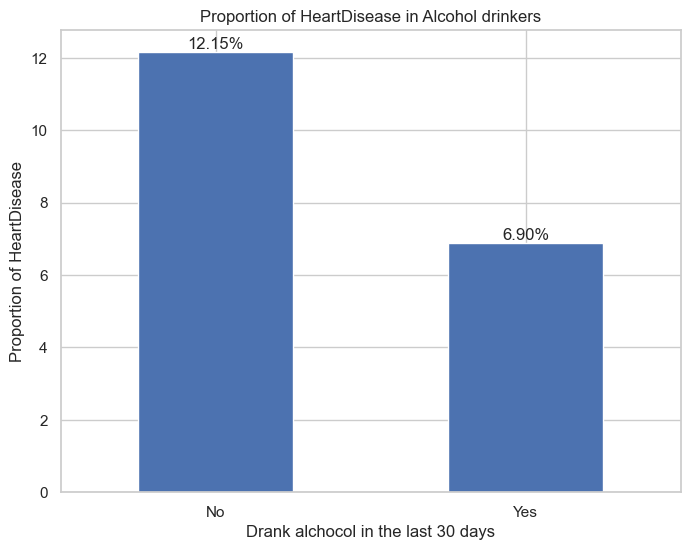

In [27]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_heart_disease_yes = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df_heart_disease_yes.groupby('AlcoholLast30days').size() / df.groupby('AlcoholLast30days').size() *100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease in Alcohol drinkers')
plt.xlabel('Drank alchocol in the last 30 days')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

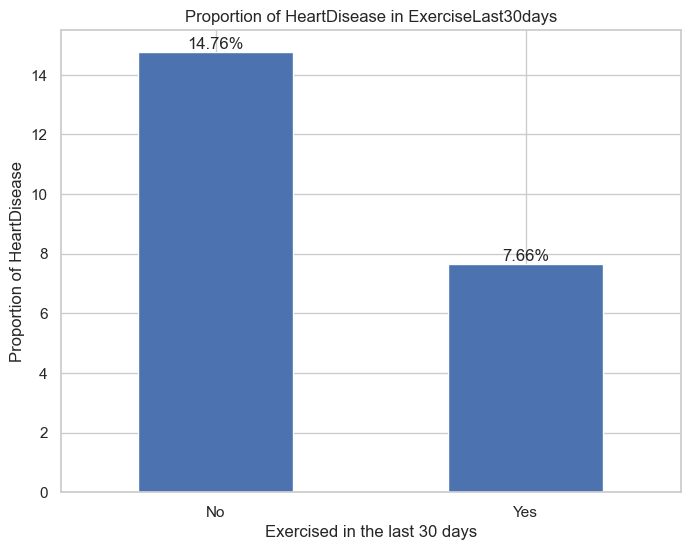

In [28]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_heart_disease_yes = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df_heart_disease_yes.groupby('ExerciseLast30days').size() / df.groupby('ExerciseLast30days').size() *100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease in ExerciseLast30days')
plt.xlabel('Exercised in the last 30 days')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

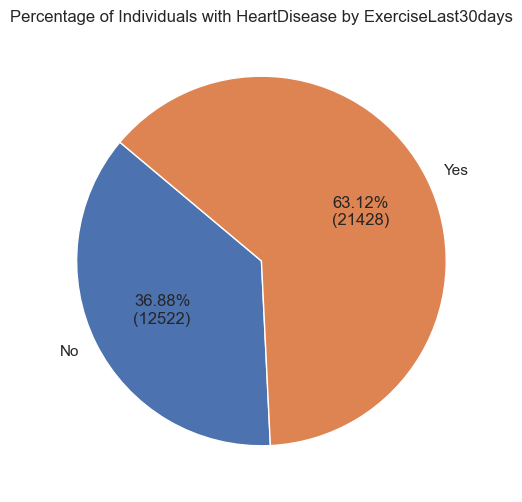

In [29]:
# Calculate the proportions of individuals with HeartDisease by ExerciseLast30days
heart_disease_proportions = df_heart_disease_yes.groupby('ExerciseLast30days').size() / total_heart_disease_yes * 100
heart_disease_counts = df_heart_disease_yes.groupby('ExerciseLast30days').size()

# Function to display both count and percentage
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

# Plot as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_proportions, labels=heart_disease_proportions.index, autopct=lambda pct: func(pct, heart_disease_counts), startangle=140)
plt.title('Percentage of Individuals with HeartDisease by ExerciseLast30days')

# Display the pie chart
plt.show()

### Visualization of Numerical Features

In [30]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepTime,Height,Weight,BMI,DrinkOccasionsPerDay
count,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000
mean,4.339512,4.408850,7.022912,1.704963,83.277729,28.558440,17.391751
std,8.561318,8.292529,1.465465,0.107164,21.405164,6.549345,28.030137
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,3.000000
75%,4.000000,4.408850,8.000000,1.780000,95.250000,31.750000,20.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000,100.000000


In [31]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])


In [32]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,len(x)+1) / n
    
    return x, y

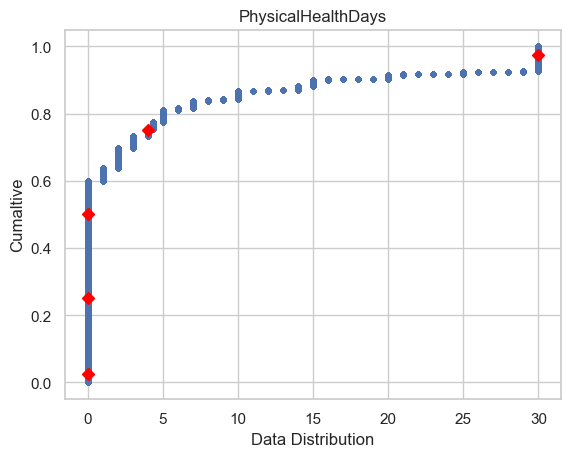

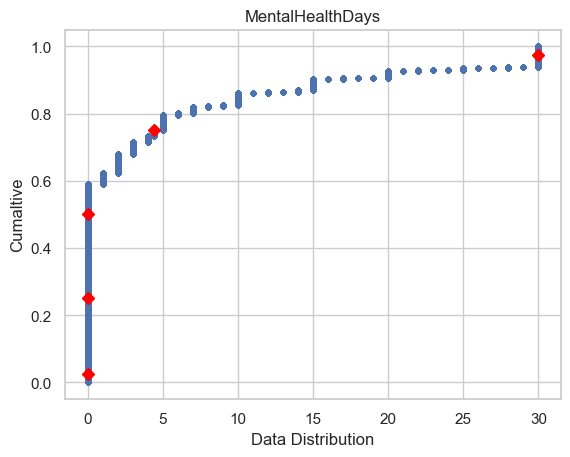

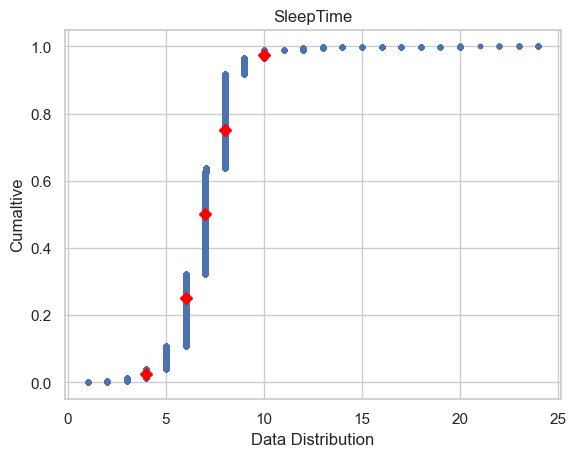

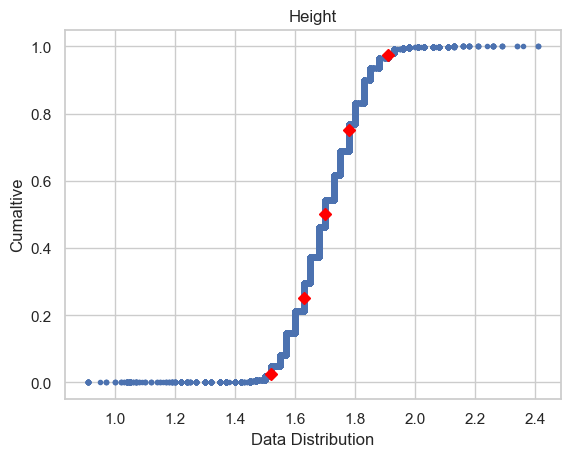

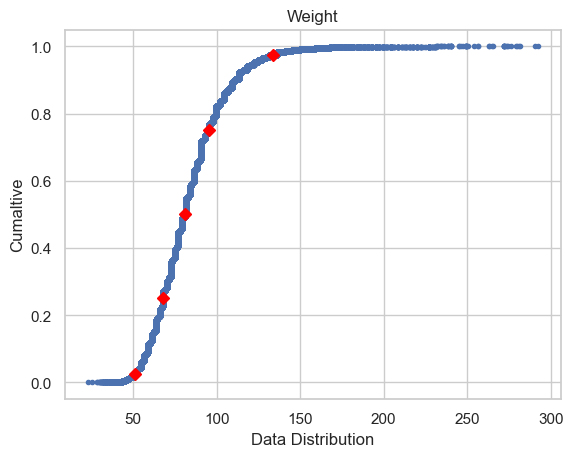

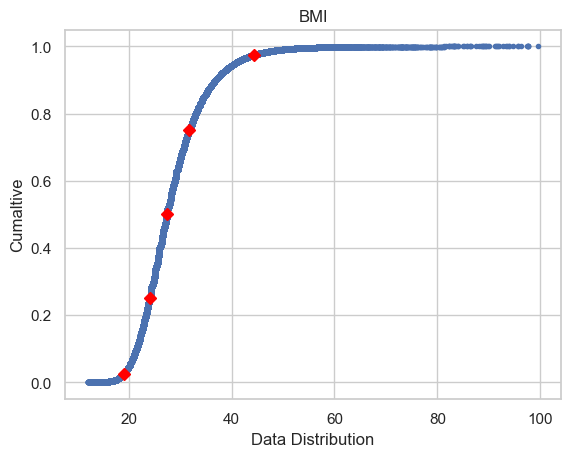

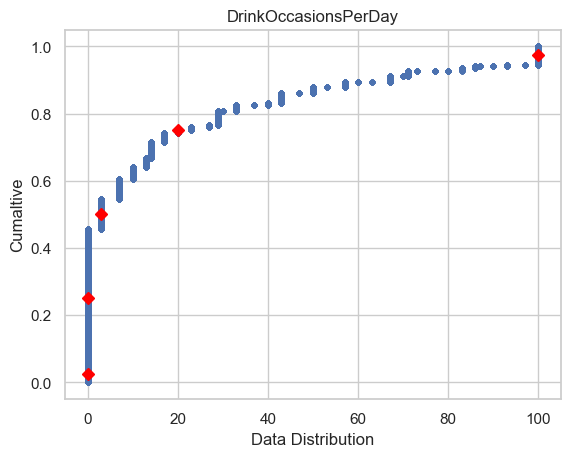

In [33]:
#Select only numeric columns
quantitative_columns = df.select_dtypes(include=['int64', 'float64']).columns
#Plot ecdf for each quantitative column
for col in quantitative_columns:
    x, y = ecdf(df[col])
    percentiles = np.array([2.5, 25, 50, 75, 97.5])
    ptiles = np.percentile(df[col], percentiles)
    
    ax = plt.figure()
    ax = plt.plot(x,y, marker ='.', linestyle = 'none')
    ax = plt.plot(ptiles, percentiles/100, marker='D', color='red',
         linestyle='none')
    ax = plt.xlabel('Data Distribution')
    ax = plt.ylabel('Cumaltive')
    ax = plt.title (col)
    ax = plt.margins =(0.02)
    plt.show()


In [34]:
df['isObese'] = (df['BMI'] >= 30.0).astype(int)

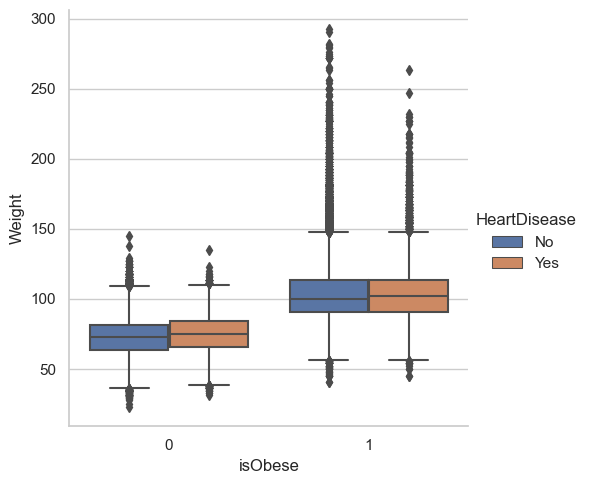

In [35]:
_ = sns.catplot(data=df, x='isObese', y='Weight', kind = 'box', hue = 'HeartDisease')
plt.show()

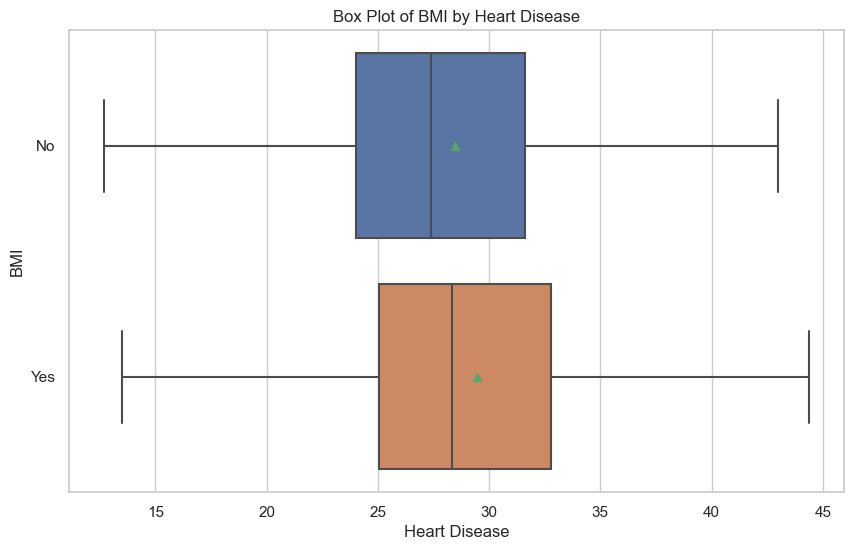

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='BMI', data=df, showfliers=False, showmeans = True)
plt.title('Box Plot of BMI by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

In [37]:
# Set the threshold for outliers
outlier_threshold = 50  # Set your desired threshold value

# Filter the DataFrame to exclude outliers beyond the threshold
df_filtered = df[df['BMI'] <= outlier_threshold]

# Get the statistical summary for BMI by Heart Disease status
statistics_table = df_filtered.groupby('HeartDisease')['BMI'].describe()

# Display the statistics table
print(statistics_table)

                 count       mean       std    min    25%    50%    75%   max
HeartDisease                                                                 
No            328257.0  28.215838  5.957671  12.02  24.02  27.37  31.47  50.0
Yes            33666.0  29.154911  6.021691  12.16  25.02  28.31  32.55  50.0


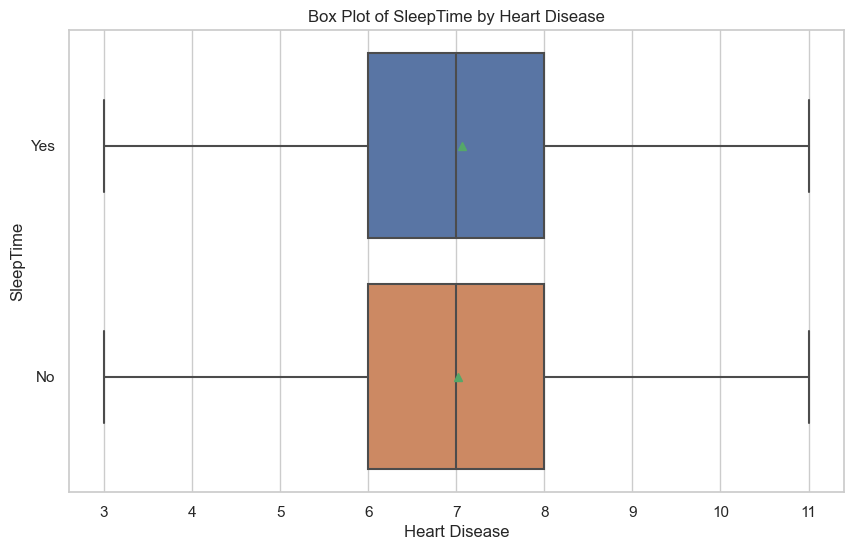

In [38]:
# Plot a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='SleepTime', data=df_filtered, showfliers= False, showmeans = True, order = ['Yes', 'No'])
plt.title('Box Plot of SleepTime by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('SleepTime')
plt.show()

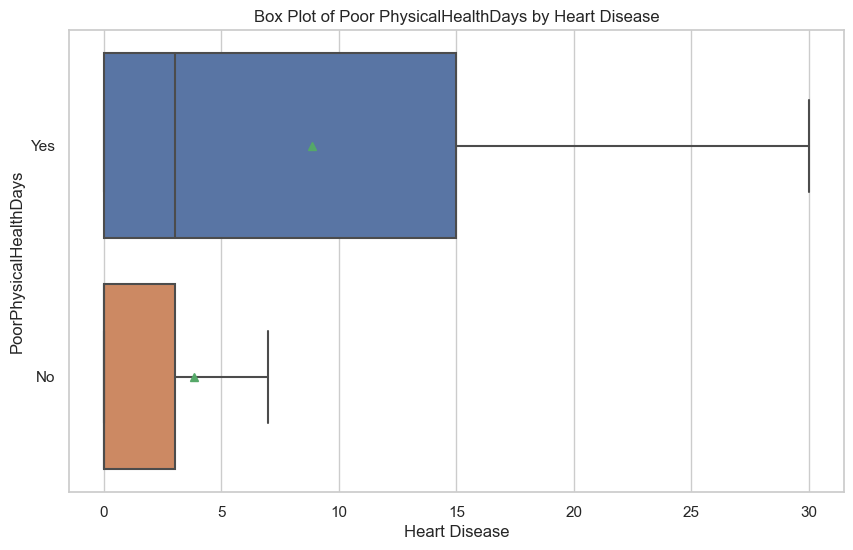

In [39]:
# Plot a box plot without outliers

plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='PhysicalHealthDays', data=df_filtered, showfliers= False, showmeans =True, order =['Yes', 'No'])
plt.title('Box Plot of Poor PhysicalHealthDays by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('PoorPhysicalHealthDays')
plt.show()

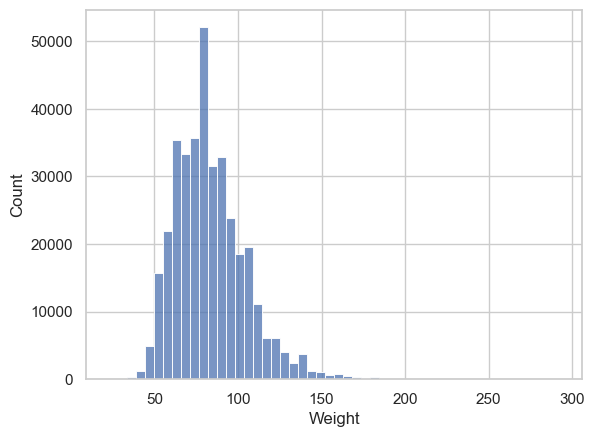

In [40]:
_ =sns.histplot(data = df, x= 'Weight', bins = 50)
plt.show()

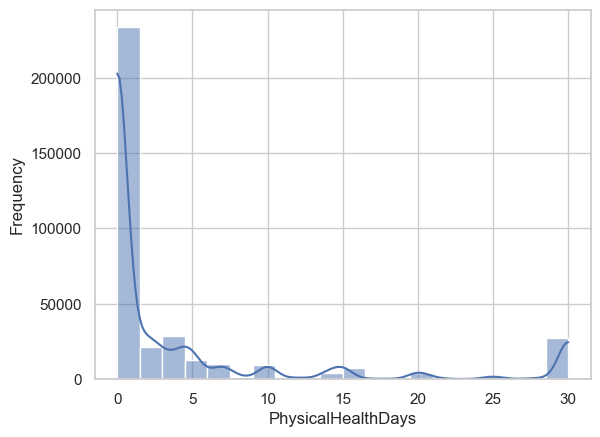

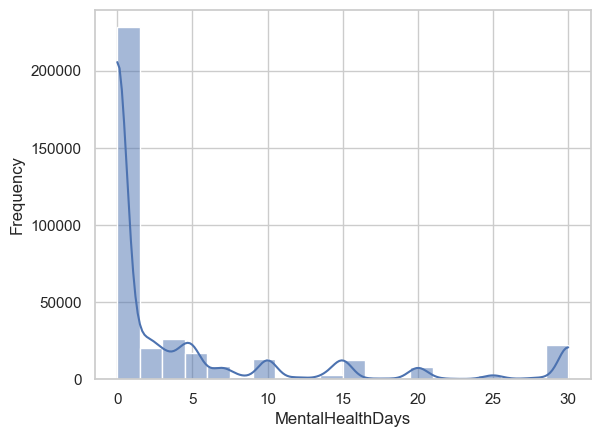

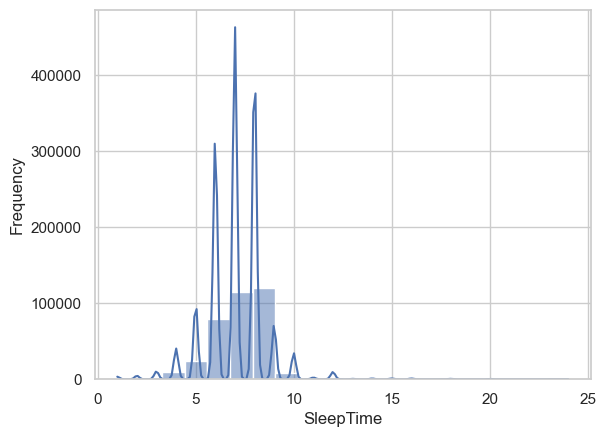

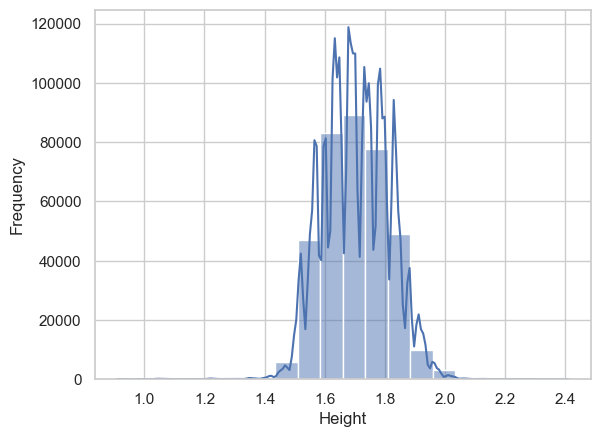

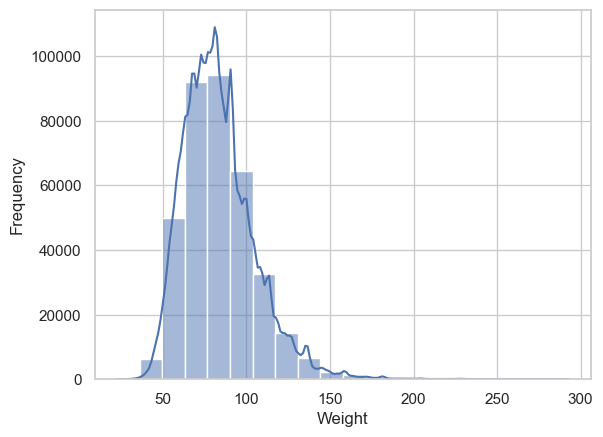

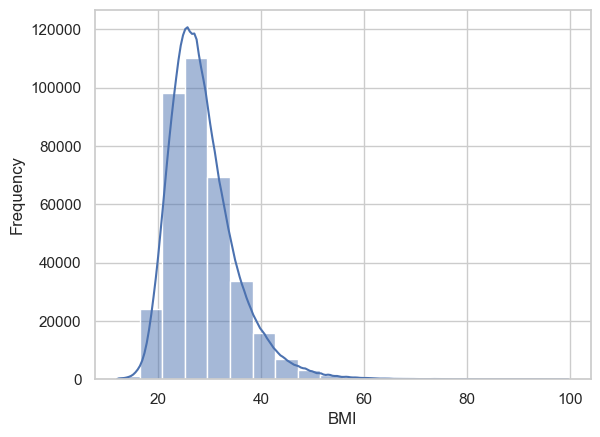

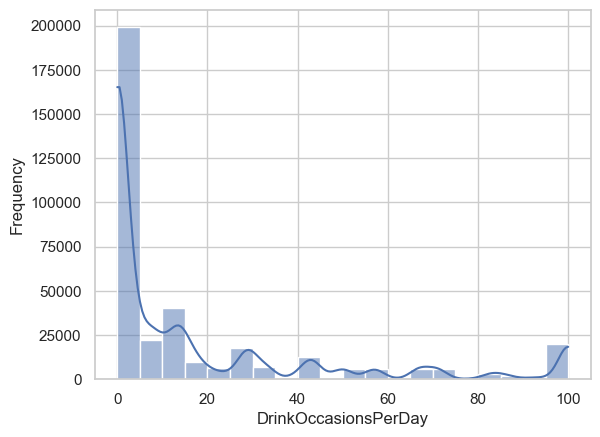

In [41]:
# Create histograms for each quantitative variable
for col in quantitative_columns:
    ax = plt.figure()
    ax = sns.histplot(data=df, x=col, kde=True, bins = 20)
    ax = plt.xlabel(col)
    ax = plt.ylabel('Frequency')
    ax = plt.margins =(1)

plt.show()

In [42]:
weight_dis = pd.crosstab(df['isObese'], df['HeartDisease'], normalize = 'index') * 100
weight_dis

HeartDisease,No,Yes
isObese,,
0,91.486613,8.513387
1,89.079675,10.920325


columns_corr = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis','Deaf', 'Blind',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingOrBathing', 'DifficultyAloneErrands','HadTetanusShot', 'HIVRisk']
df2 = df[columns_corr].copy()

In [43]:
df['Smoked'] = df['Smoked'].map({'Smoked': 1, 'Never smoked': 0})

In [44]:
# List of columns to encode
columns_to_encode = df.columns[df.nunique() == 2].tolist()

exclude_col = ['Sex','isObese','Smoked']

columns_to_encode = [i for i in columns_to_encode if i not in exclude_col]
# Loop through each column and apply mapping
for column in columns_to_encode:
    # Convert 'Yes' to 1 and 'No' to 0
    df[column] = df[column].map({'Yes': 1, 'No': 0})




In [45]:
continous_columns = ['PhysicalHealthDays','MentalHealthDays', 'SleepTime','Height','Weight','BMI', 'DrinkOccasionsPerDay','HeartDisease']
df_continuous = df[continous_columns].copy()
categorical_columns = ['State','Sex','GeneralHealth','ExerciseLast30days','HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                    'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','Deaf','Blind','DifficultyConcentrating',
                    'DifficultyWalking','DifficultyDressingOrBathing','DifficultyAloneErrands','EcigUsage','HadChestScan','FluShotLast12Months',
                    'HadPneumoniaShot','HadTetanusShot','HIVRisk','HadCovid','HeartDisease','RaceEthnicityGroup','AgeGroup5yrs','LevelOfSmoker',
                    'AlcoholLast30days','TestedForHIV' ,'isObese', 'Smoked']
df_categorical = df[categorical_columns].copy()

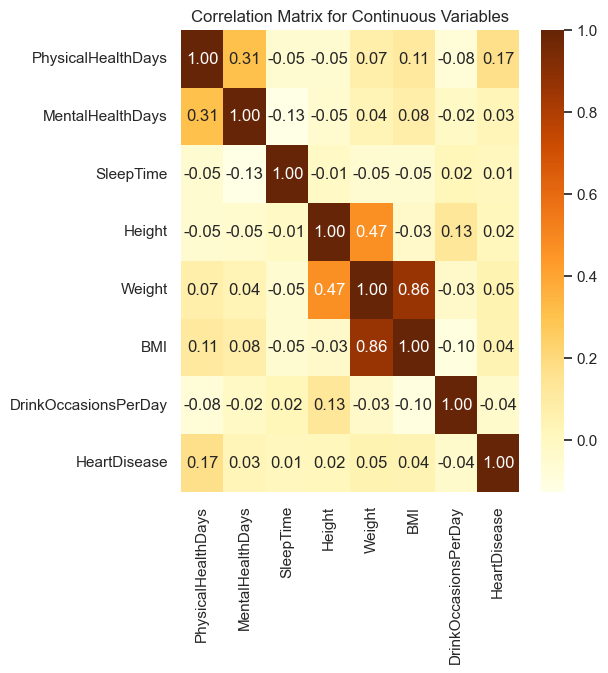

Correlation Matrix for Continuous Variables:
                      PhysicalHealthDays  MentalHealthDays  SleepTime  \
PhysicalHealthDays              1.000000          0.307312  -0.053482   
MentalHealthDays                0.307312          1.000000  -0.126384   
SleepTime                      -0.053482         -0.126384   1.000000   
Height                         -0.051604         -0.050407  -0.014782   
Weight                          0.073279          0.040404  -0.054697   
BMI                             0.112993          0.076291  -0.052737   
DrinkOccasionsPerDay           -0.079041         -0.019143   0.020115   
HeartDisease                    0.171695          0.028541   0.009934   

                        Height    Weight       BMI  DrinkOccasionsPerDay  \
PhysicalHealthDays   -0.051604  0.073279  0.112993             -0.079041   
MentalHealthDays     -0.050407  0.040404  0.076291             -0.019143   
SleepTime            -0.014782 -0.054697 -0.052737              0.020

In [46]:
# Calculate correlation matrix for continuous variables
correlation_continuous = df_continuous.corr()

# Plot correlation matrix for continuous variables
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(correlation_continuous, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

# Display the correlation matrix as a table
print("Correlation Matrix for Continuous Variables:")
print(correlation_continuous)


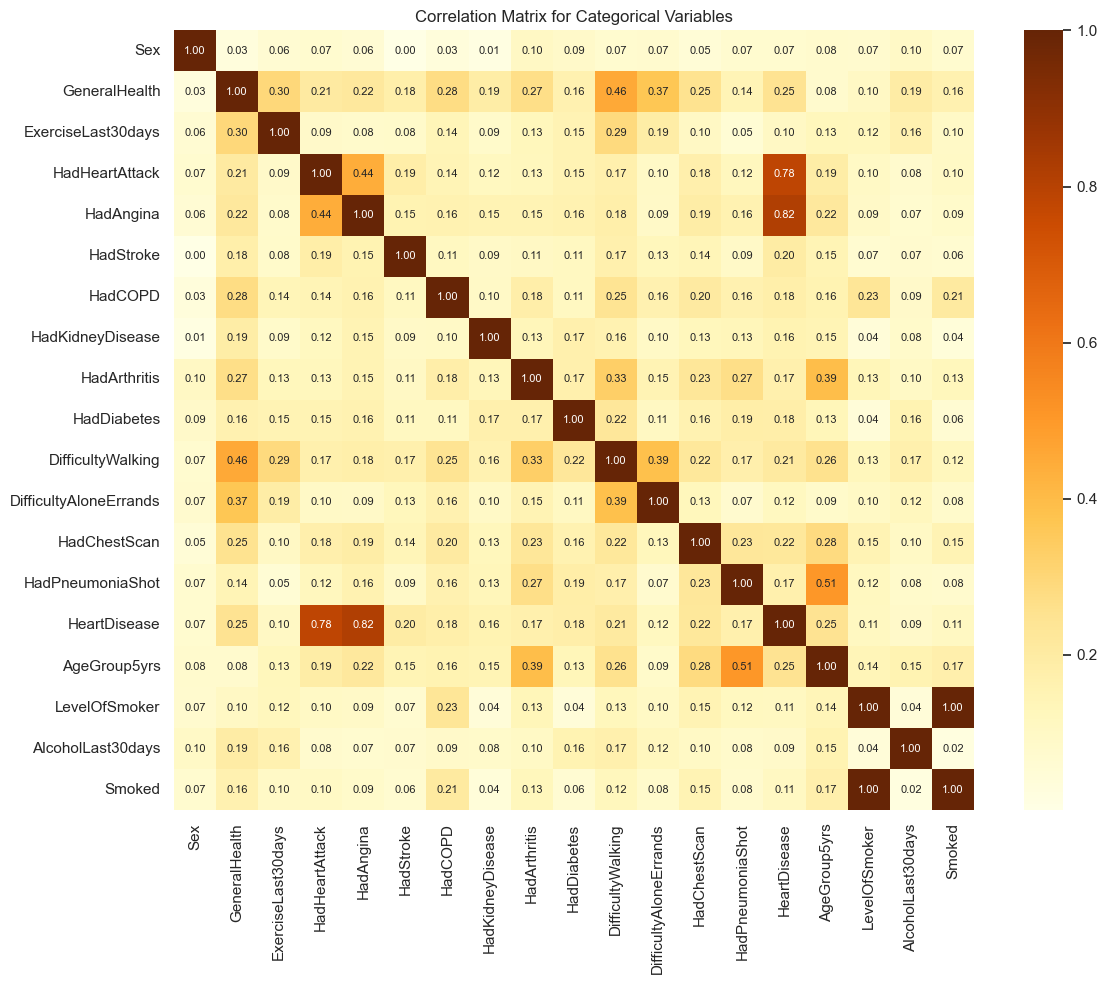

In [47]:
# Define the function for Cramer's V correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, ex = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# List of categorical columns
categorical_columns = df_categorical.columns

# Initialize an empty DataFrame to store Cramer's V correlations
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramer's V for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# List of columns to drop
columns_to_drop = ['State','HadAsthma','HadSkinCancer','Deaf', 'Blind', 'EcigUsage','HadTetanusShot','HIVRisk','HadCovid', 'HadDepressiveDisorder', 'DifficultyConcentrating','TestedForHIV','RaceEthnicityGroup','isObese', 'DifficultyDressingOrBathing','FluShotLast12Months']  # Replace with the actual column names you want to remove

# Drop the specified columns from the matrix
cramers_v_matrix = cramers_v_matrix.drop(columns=columns_to_drop, index=columns_to_drop)

# Plot correlation matrix for categorical variables
plt.figure(figsize=(12, 10))  # Adjusted size for clarity
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='YlOrBr', fmt=".2f",annot_kws={"size": 8})
plt.title('Correlation Matrix for Categorical Variables')
plt.tight_layout()
plt.show()

#print("Correlation Matrix for Categorical Variables:")
#print(cramers_v_matrix.astype(float))

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define the function for Cramer's V correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, ex = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# List of categorical columns
categorical_columns = df_categorical.columns

# Initialize an empty DataFrame to store Cramer's V correlations
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramer's V for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# List of columns to drop
columns_to_drop = ['State','HadAsthma','HadSkinCancer','Deaf', 'Blind', 'EcigUsage','HadTetanusShot','HIVRisk','HadCovid', 'HadDepressiveDisorder', 'DifficultyConcentrating','TestedForHIV','RaceEthnicityGroup','isObese', 'DifficultyDressingOrBathing','FluShotLast12Months']

# Drop the specified columns from the matrix
cramers_v_matrix = cramers_v_matrix.drop(columns=columns_to_drop, index=columns_to_drop)

# Display the correlation matrix as a table
print("Correlation Matrix for Categorical Variables:")
print(cramers_v_matrix.astype(float))

Correlation Matrix for Categorical Variables:
                             Sex  GeneralHealth  ExerciseLast30days  \
Sex                     1.000000       0.029366            0.060315   
GeneralHealth           0.029366       1.000000            0.295886   
ExerciseLast30days      0.060315       0.295886            1.000000   
HadHeartAttack          0.070881       0.207492            0.089747   
HadAngina               0.057697       0.219320            0.081776   
HadStroke               0.001050       0.178170            0.083672   
HadCOPD                 0.033872       0.276006            0.141384   
HadKidneyDisease        0.014655       0.191494            0.086331   
HadArthritis            0.102941       0.268827            0.128973   
HadDiabetes             0.090257       0.162227            0.149506   
DifficultyWalking       0.070937       0.456931            0.286852   
DifficultyAloneErrands  0.072077       0.365602            0.191819   
HadChestScan            0.05047

In [49]:
columns_to_encode # we need to exclude sex and isObese

['ExerciseLast30days',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'Deaf',
 'Blind',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingOrBathing',
 'DifficultyAloneErrands',
 'HadChestScan',
 'FluShotLast12Months',
 'HadPneumoniaShot',
 'HIVRisk',
 'HeartDisease',
 'AlcoholLast30days',
 'TestedForHIV']

In [50]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Replace with your actual column names

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns with numerical labels
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
print(df)

        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
1           0    0              0                 0.0               0.0   
2           0    0              4                 2.0               3.0   
3           0    0              0                 0.0               0.0   
4           0    0              1                 2.0               0.0   
5           0    1              3                 1.0               0.0   
...       ...  ...            ...                 ...               ...   
445127     48    0              2                 0.0               3.0   
445128     48    0              0                 2.0               2.0   
445129     48    0              3                30.0              30.0   
445130     48    1              4                 0.0               0.0   
445131     48    1              4                 0.0               1.0   

        LastCheckup  ExerciseLast30days  SleepTime  HadHeartAttack  HadAngina  \
1                 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'features' and 'target' with your actual feature matrix and target variable
dropped_columns = ['HeartDisease']
X = df.drop(columns=dropped_columns)  # Drop the target column from the features
y = df['HeartDisease']

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')  # or 'median', 'most_frequent' depending on your preference

# Fit the imputer to your data and transform it
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X_imputed, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                        Feature  Importance
9                     HadAngina    0.451509
8                HadHeartAttack    0.431589
32                 AgeGroup5yrs    0.012506
25                 HadChestScan    0.010477
21            DifficultyWalking    0.009313
10                    HadStroke    0.008907
35                          BMI    0.005343
13                      HadCOPD    0.005068
34                       Weight    0.004763
27             HadPneumoniaShot    0.004532
17                  HadDiabetes    0.004531
3            PhysicalHealthDays    0.004499
0                         State    0.004488
33                       Height    0.003904
16                 HadArthritis    0.003671
7                     SleepTime    0.003048
2                 GeneralHealth    0.002958
15             HadKidneyDisease    0.002399
38         DrinkOccasionsPerDay    0.002155
4              MentalHealthDays    0.002089
28               HadTetanusShot    0.001975
1                           Sex 

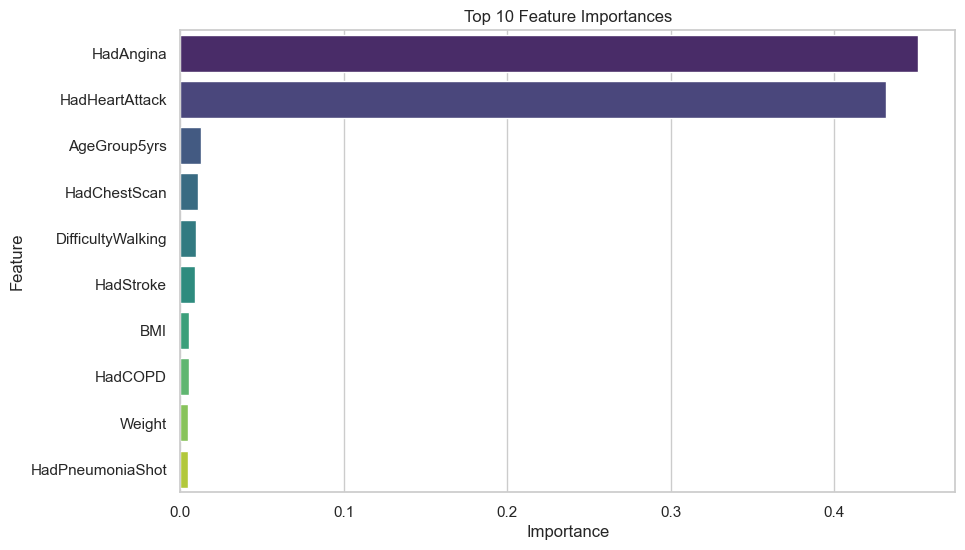

In [52]:
# Sort the features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = sorted_feature_importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')  # Use sns.barplot for better aesthetics
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

we can test features during the modelling, for now we can leave everything in for EDA 

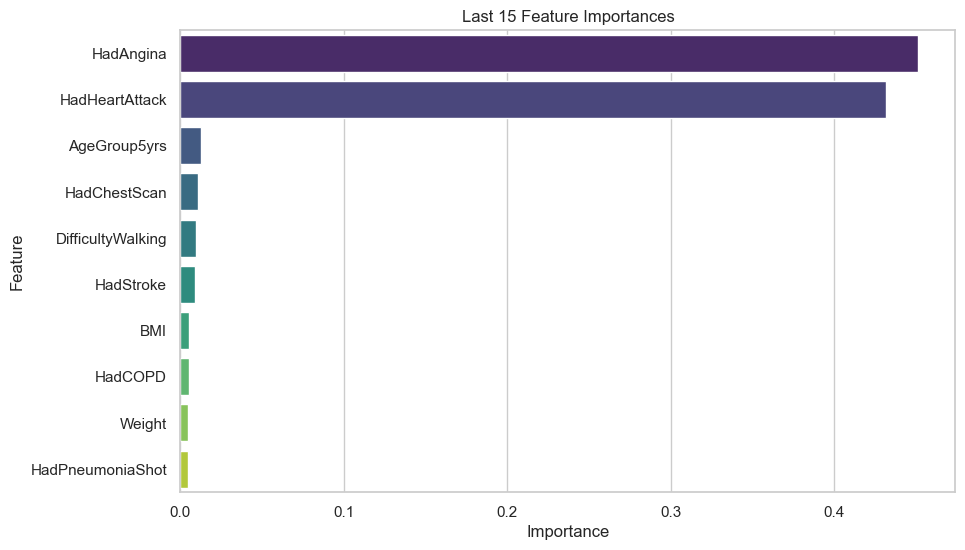

In [53]:
# Sort the features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
last_10_features = sorted_feature_importance_df.tail(15)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')  # Use sns.barplot for better aesthetics
plt.title('Last 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()